### Author: Chow Chun Mun
### Practical Examination in Actuarial Data Science Immersion, 13 April – 13 May 2025
### Part II (Python)

## Diabetes Hospital Readmission: Focus on Neural Networks and Embeddings

<hr style="width:50%; margin-left:25% !important; margin-right:25% !important;" />

__IMPORTANT NOTES ON COMPLETING THIS PART OF THE TASK__

The second part of the exam is to be implemented in Python. An existing Jupyter notebook, which has been
deemed suitable, should be used as a template and adapted to different data and modified questions.

The notebook for the use case “Forecasting Rare Events: Credit Scoring” of DAV (see https://aktuar.de/en/knowledge/specialist-information/detail/forecasting-rare-events-credit-scoring/) serves as
a template for the tasks PT1, PT2, PT3, and PT7 b). It must be modified according to the task requirements
(i.e., texts, code, and notebook cells should be appropriately modified, added, removed, or commented out).
The notebook to be used as a template is in an amended and slightly edited version named
`template2-credit-scoring-english.ipynb` in the examination materials and will hereafter be referred to
by the abbreviation CSN. Remark: This notebook.

Tasks PT0 and PT4 to PT7 a) cover new topics that have not been addressed in the notebook template. These
tasks require the addition of new notebook cells, and the notebook must be expanded accordingly.

The datasets `diabetic_data_bin.csv` and `icd9_data.csv`, generated in Task R1 of Part I, are required for
further processing.

When making revisions, ensure that section numbers from the original notebook CSN remain unchanged (in
the first three tasks PT1 to PT3). The corresponding headings can be adjusted as needed. The texts taken
from the template must be adapted to reflect the modified context (e.g., data and results). Unnecessary text
can be removed.

<hr style="width:50%; margin-left:25% !important; margin-right:25% !important;" />

##  <font color='red'> Task PT0: Setting Up a Development Environment [Learning objectives: 5.1 — Points: 1]]</font>

For setting up the development environment, Python 3.10.16 is recommended. The examination materials
include a `requirements.txt` file, which contains the necessary packages. Based on this file, the required
packages can be installed. The Python version used must be displayed. Additionally, the installed packages
must be listed clearly (five packages with version numbers per line)

__Solution:__

---
First of all, we create a Python environment and install the required dependencies.

The following description assumes that Python (version 3.13.3) along with Anaconda has already been installed on your computer. Now, to set up a Python environment with Python 3.10.16 for the following code and install dependencies via the command line, proceed as follows:

1. Open a terminal and navigate to the directory where your project is located.
2. Use the following command to create a virtual environment with Python 3.10.16:
    ```python
    conda create --name cads3 python=3.10.16
    ```
3. Activate the virtual environment with the corresponding command:
    ```python
    conda activate cads3
    ```
4. Install the dependencies from the requirements.txt file given:
    ```python
    pip install -r requirements.txt
    ```

Display the Python version:

In [1]:
!python --version

Python 3.10.16


Display the list of installed packages:

In [2]:
# Import the package `subprocess` to run shell commands and capture its output
import subprocess

# Run the pip list command to get the installed packages in the format `package==version` with --format=freeze
result = subprocess.run(["pip", "list", "--format=freeze"], 
                        capture_output=True, 
                        text=True)      # Return output as a string (instead of bytes)

# Split the output by lines and store it in a list
package_list = result.stdout.splitlines()

# Calculate the maximum length of the package-version strings for alignment of the output
max_package_length = max(len(pkg) for pkg in package_list)

# Print the packages in a nicely left-aligned format (5 per line)
print("List of installed packages:\n")

for i in range(0, len(package_list), 5):
    line = ""
    for pkg in package_list[i:i + 5]:
        # Align package-version pairs in columns
        line += f"{pkg.ljust(max_package_length)}" + "\t"
    print(line)

List of installed packages:

absl-py==2.1.0                      	asttokens==3.0.0                    	astunparse==1.6.3                   	catboost==1.2.7                     	certifi==2024.12.14                 	
charset-normalizer==3.4.0           	colorama==0.4.6                     	comm==0.2.2                         	contourpy==1.3.1                    	cycler==0.12.1                      	
debugpy==1.8.11                     	decorator==5.1.1                    	exceptiongroup==1.2.2               	executing==2.1.0                    	flatbuffers==24.3.25                	
fonttools==4.55.3                   	gast==0.6.0                         	google-pasta==0.2.0                 	graphviz==0.20.3                    	grpcio==1.68.1                      	
h5py==3.12.1                        	idna==3.10                          	importlib_metadata==8.5.0           	ipykernel==6.29.5                   	ipython==8.31.0                     	
jedi==0.19.2                        	Jinj

##  <font color='red'> Task PT1: Creating a Good Benchmark Model as Simply as Possible [Learning objectives: 5.1 — Points: 4] </font>

Based on the CSN notebook (Part A), the following adjustments must be made:

- Remove all cells before the text “Part A: Quick & Easy” that relate to the original topic of credit scoring.
- Within "Part A: Quick & Easy":
    * Include all packages used in the notebook in Section 1.1, and remove any unnecessary imports. Use a RANDOM SEED of 42.
    * Replace the dataset "../input/home-credit-default-risk/application train.csv" used in Section 1.2 with the dataset diabetic data bin.csv created in Task R1 of Part I. What modifications are necessary to correctly load the dataset?
    * Set the data type of every feature read in that has a name ending with “ id” to “object.” What advantage does this approach offer?
    * For Part A, no additional modifications to the dataset are required beyond those already present in the notebook. If certain code blocks are not needed, comment them out with an appropriate note. Reminder: Keep in mind here and throughout the rest of the notebook the general guideline that texts must be
adapted to the dataset.

__Solution:__

<h1 id="parta"
    style="font-size:22px; font-weight: 500; background-color: #E6E6E6; color: black; height: 50px; line-height: 46px; padding-left: 14px;">
    Part A: Quick & Easy
    <a class="anchor-link"
       href="#parta"
       target="_self"
       rel=" noreferrer nofollow">
    </a>
</h1>

In Part A, we establish a baseline for model performance using a straightforward yet effective CatBoost algorithm that provides a quick insight into the predictive power of our dataset. As we progress through Parts B and C, we will explore more advanced models and optimization methods to enhance our predictions and better understand hospital readmission behavior for diabetic patients.

<h1 id="a01"
    style="font-size:18px; font-weight:bold;">
    1. Developing an Initial Baseline Machine Learning Model
    <a class="anchor-link"
       href="#a01"
       target="_self"
       rel=" noreferrer nofollow">
    </a>
    <hr style="border: none; border-top: 3px solid black; margin-top: 10px;">
</h1>

In this very first section, we will quickly build a basic machine learning model for the binary classification task of predicting hospital readmission within 30 days. This baseline model will serve as a benchmark for all subsequent machine learning models.

<h2 style="font-size:16px; font-weight:bold;">1.1 Setting Up the Modeling Environment</h2>

We begin by importing all required libraries, calibrating visualization parameters, and setting a random seed to ensure the reproducibility of our results.

In [3]:
import os
# Set environment variable to ignore all warnings
os.environ['PYTHONWARNINGS'] = 'ignore'

# Standard Python libraries for data analysis, scientific computing, and plotting
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import re
import random
from scipy.stats import uniform, loguniform

# Setting display options for pandas and matploblib
pd.set_option('display.max_columns', None)
COLOR_LIGHT, COLOR_DARK = '#849CBE', '#00548A'

# Scikit-learn modules for preprocessing and machine learning models
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import roc_auc_score

# Gradient boosting frameworks and logistic regression
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import statsmodels.formula.api as smf

# Tensorflow and Keras for artificial neural networks
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input, Embedding, Flatten, Concatenate, Dropout
from tensorflow.keras.utils import set_random_seed

# Ensure reproducibility
RANDOM_SEED = 42
set_random_seed(RANDOM_SEED)

To optimize resource usage, we adjust TensorFlow's GPU memory settings, enabling efficient computation throughout our modeling workflow.

<span style="color: green">However, upon reviewing the packages specified in the `requirements.txt`, we decide not to use GPU for the time being and, as a result, comment out the relevant code.</span>

In [4]:
# # Prevent TensorFlow From Fully Allocating GPU Memory
# # Ref: https://www.tensorflow.org/guide/gpu#limiting_gpu_memory_growth
# gpus = tf.config.list_physical_devices('GPU')
# if gpus:
#     try:
#     # Currently, memory growth needs to be the same across GPU
#         for gpu in gpus:
#             tf.config.experimental.set_memory_growth(gpu, True)
#         logical_gpus = tf.config.list_logical_devices('GPU')
#         print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
#     except RuntimeError as e:
#         # Memory growth must be set before GPUs have been initialized
#         print(e)

<h2 style="font-size:16px; font-weight:bold;">1.2 Load and examine the input data</h2>

Next, we load the mentioned dataset `diabetic_data_bin.csv`. In order to prevent `pandas` from interpreting certain strings such as "None" as a missing value, and since our dataset has no `NA`values as generated in Part I, we disable automatic NA detection via `na_filter=False`.

Then, we display its dimensions by printing the number of rows and columns. We also present several randomly selected rows to illustrate its content and its data structure.

In [5]:
# Load the dataset into a pandas DataFrame without interpreting any strings as NaN
df_raw = pd.read_csv("../02_tidy_data/diabetic_data_bin.csv", # UPDATE this path if needed
                     na_filter=False) # Ensures all values are read as-is (no auto-NaN)

# Display the dimensions of the dataset (rows, columns)
print(f"Input Dataset dimensions (rows, columns): {df_raw.shape}")

# Display a random sample of 7 rows from the dataset to inspect data
df_raw.sample(n=7, random_state=RANDOM_SEED)

Input Dataset dimensions (rows, columns): (47751, 51)


,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,TARGET,group_diag_1,group_diag_2,group_diag_3
47523,Asian,Female,[50-60),?,3,6,1,1,?,Orthopedics,18,4,6,0,0,0,722,250,401,4,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0,Musculoskeletal,Diabetes,Circulatory
8582,Caucasian,Male,[40-50),?,2,6,4,8,?,?,45,6,53,0,0,0,410,414,401,7,None,None,No,No,No,No,No,No,No,Up,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Ch,Yes,0,Circulatory,Circulatory,Circulatory
42024,Caucasian,Female,[70-80),?,1,3,7,3,MC,?,47,0,13,0,0,0,25012,427,276,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0,Diabetes,Circulatory,Other
15219,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,InternalMedicine,35,2,7,0,0,0,25013,280,789,5,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,0,Diabetes,Other,Neoplasms
45649,Caucasian,Female,[60-70),?,1,2,7,1,?,?,23,0,11,0,0,0,410,414,250,5,None,>8,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,1,Circulatory,Circulatory,Diabetes
23448,Caucasian,Male,[80-90),?,3,28,1,1,SP,?,55,0,13,0,0,0,294,312,414,5,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,1,Other,Other,Circulatory
39945,Caucasian,Male,[40-50),?,1,1,7,4,?,?,56,2,16,1,0,0,535,584,25041,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,1,Other,Genitourinary,Diabetes


Now, we set the data type of every feature with a name ending in "_id" to `object`.

The advantage of setting "_id" fields as `object` during data loading is that IDs are typically used as identifiers. If kept as integers or floats, they might be misinterpreted during processing (e.g., statistics, scaling, etc.) and modeling. Additionally, IDs like "00123", if read as numbers, would become "123", losing their leading zeros. Using object ensures they are treated as categorical or string-like, preserving their meaning and formatting while preventing unintended calculations.

In [6]:
# Find columns whose names end with "_id"
id_columns = [col for col in df_raw.columns if col.endswith("id")]

# Convert their types to 'object'
df_raw[id_columns] = df_raw[id_columns].astype('object')

We output now the data types of each column of our dataset to check that they are set correctly. 

In [7]:
# Format column names and dtypes
dtypes_list = [f"{col:<25}: {str(dtype):<10}" for col, dtype in df_raw.dtypes.items()]

# Print the column types in a nicely left-aligned format (5 per line)
print("List of data features and their types:\n")

for i in range(0, len(dtypes_list), 5):
    print(" ".join(dtypes_list[i:i+5]))

List of data features and their types:

race                     : object     gender                   : object     age                      : object     weight                   : object     admission_type_id        : object    
discharge_disposition_id : object     admission_source_id      : object     time_in_hospital         : int64      payer_code               : object     medical_specialty        : object    
num_lab_procedures       : int64      num_procedures           : int64      num_medications          : int64      number_outpatient        : int64      number_emergency         : int64     
number_inpatient         : int64      diag_1                   : object     diag_2                   : object     diag_3                   : object     number_diagnoses         : int64     
max_glu_serum            : object     A1Cresult                : object     metformin                : object     repaglinide              : object     nateglinide              : object    
chlorpropa

We see that our features are of the correct data type as desired.

Note that the IDs in our case are formatted as, e.g., `3` instead of `03`. Rather than specifying the `dtype` parameter at **load time** to treat the ID columns as non-numeric, we set the data type **after loading** to preserve the order, particularly for later visualization.

Moreover, in contrast to R, we don't convert our binary target variable (`0`, `1`) to type `object` in Python. Most machine learning libraries like **scikit-learn**, **XGBoost**, or **LightGBM** expect numerical inputs for classification, and a binary target with values `0` and `1` is perfect for binary classification.

Subsequently, we will assess the balance of the dataset by plotting the distribution of the 'TARGET' variable.

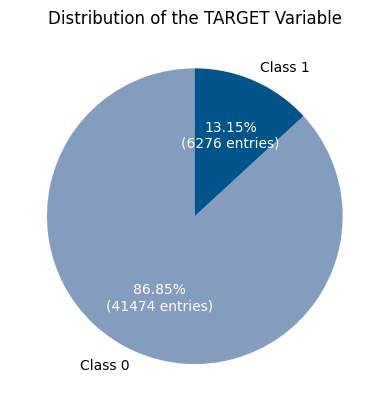

In [8]:
# Count the occurrences of each unique value in the 'TARGET' column
target_counts = df_raw['TARGET'].value_counts()

# Calculate the total number of entries
total_entries = len(df_raw['TARGET'])

# Define a custom formatting function for the pie chart labels
def custom_autopct(pct):
    absolute = int(pct/100.*total_entries)
    return "{:.2f}%\n({:d} entries)".format(pct, absolute)

# Create a pie chart to visualize the distribution of classes in the 'TARGET' column
pie_chart, _, autotexts = plt.pie(target_counts, labels=target_counts.index.map({0: 'Class 0', 1: 'Class 1'}),
                                  autopct=custom_autopct, startangle=90,
                                  colors=[COLOR_LIGHT, COLOR_DARK], wedgeprops={'edgecolor': 'none'})

# Set the color of the autopct texts to white
for autotext in autotexts:
    autotext.set_color('white')

# Plot the pie chart
plt.title('Distribution of the TARGET Variable')
plt.show()

The pie chart illustrates a clear imbalance in the distribution of the dependent variable `TARGET`: The critical class `1` appears significantly less frequently than class `0`.

Accurate classification of rare events is challenging in imbalanced datasets, such as the one observed with the `TARGET` variable. In these scenarios, it is advisable to use the area under the receiver operating characteristic curve (AUC) rather than accuracy as the performance metric. While accuracy reflects overall prediction correctness, it can be misleading by not accounting adequately for the performance on minority classes. In contrast, AUC evaluates a model's ranking ability, which is particularly relevant in distinguishing between classes in imbalanced contexts. AUC measures the trade-off between the true positive rate and the false positive rate, providing a more nuanced understanding of a model's capacity to identify rare events. We will look at this in more detail in Part B.

<h2 style="font-size:16px; font-weight:bold;">1.3 Replacing aka. detecting missing categorical values</h2>

While many machine learning (ML) tools require the more complex data preparation steps described in Part B, CatBoost, the ML tool of our choice, only requires the minimal data preparation implemented below by replacing missing categorical values with a predefined value.

<span style="color: green">In our case where we know our dataset has no `NA` values, this session just serves as a sanity check.</span>

In [9]:
# Identify categorical features by data type 'object'
categorical_features = list(df_raw.select_dtypes(include=['object']).columns)

# Compute the number of unique values for each categorical feature and reset the index to make 'Feature Names' a column
categorical_feature_counts = df_raw[categorical_features].nunique().reset_index()

# Set the column names to 'Categorical Feature' and 'Number of Unique Values'
categorical_feature_counts.columns = ['Categorical Feature', 'Number of Unique Values']

# Sort the DataFrame by 'Number of Unique Values' in descending order
categorical_feature_counts.sort_values(by='Number of Unique Values', ascending=False, inplace=True)

# Display the resulting DataFrame
display(categorical_feature_counts.style.hide(axis='index'))

Categorical Feature,Number of Unique Values
diag_3,724
diag_2,678
diag_1,661
medical_specialty,45
payer_code,17
discharge_disposition_id,15
admission_source_id,11
group_diag_3,10
group_diag_1,10
age,10


Next, we identify those categorical features that contain missing values and calculate the percentage of values that are absent.

In [10]:
# Define a function that returns a DataFrame with features containing missing values
# and the percentage of missing values for each of these features
def missing_values_percentage(data):
    # Calculate percentages and create a DataFrame
    nan_percentages = data.isna().sum() * 100 / len(data)
    missing_values_df = pd.DataFrame({
        'Categorical Feature': nan_percentages.index, 
        'Missing Percent': nan_percentages.values
    })
    # Format the 'Missing Percent' column as a percentage string with two decimal places
    missing_values_df['Missing Percent'] = missing_values_df['Missing Percent'].apply(lambda x: f'{x:.2f}%')
    # Filter out features without missing values and sort by percentage
    missing_values_df = missing_values_df[missing_values_df['Missing Percent'] != '0.00%']
    missing_values_df.sort_values(by='Missing Percent', ascending=False, inplace=True)
    return missing_values_df

# Calculate the proportion of missing values for the categorical features
missing_values_df = missing_values_percentage(df_raw[categorical_features])

# Display the resulting DataFrame without the index using the new recommended Styler.hide method
missing_values_df_styled = missing_values_df.style.hide(axis='index')
display(missing_values_df_styled)

Categorical Feature,Missing Percent


To address missing values in categorical columns without imputing data or dropping records, we will assign instances of missing data to a distinct category, `__missingValue__`. This strategy allows our machine learning algorithms to process missingness as an informative feature in its own right, thereby maintaining the dataset's full breadth and the integrity of input for modeling.

<span style="color: green">In this case, it confirms that our dataset has no "real" missing values `NA` as expected. As informed earlier, the missing values have been preprocessed by assigning instance of missing data to a distinct category, `?`. Hence, we include and comment out the following code for the sake of completeness.</span>

In [11]:
# # Replace missing values with a new category '__missingValue__' in all categorical columns
# df_raw[categorical_features] = df_raw[categorical_features].fillna('__missingValue__')

<h2 style="font-size:16px; font-weight:bold;">1.4 Partitioning data into training, validation, and test subsets</h2>

When we train a machine learning classifier, we don't just want it to learn to model the training data, or simply memorisz them (ML models can be large and complex enough to do this). We want the model to generalize to data it hasn't seen before. Therefore, model performance is usually measured against a held-out test set consisting of examples that have never been seen before. For consistency with upcoming model optimization strategies, we randomly divide our dataset into three parts:

* <u>Training set</u>: 70% of examples used for model training
* <u>Validation set</u>: 15% to validate our models after the training and possibly decide on changes
* <u>Test set</u>: 15% for the final measurement of the generalization performance of all relevant models (see [Section 11](#a11))

This division allows for effective model training, hyperparameter tuning to prevent overfitting, and unbiased evaluation of performance on new, unseen data.

Given the original code block, no additional modifications are required apart from dropping only the column **TARGET** in the feature set `X_raw`.

In [12]:
# Constants for data split ratios
TRAIN_RATIO = 0.7
VAL_TEST_RATIO = 0.5  # Splitting the remaining 30% equally into validation and test

# Separate the features (X) and the target (y)
X_raw = df_raw.drop(columns=['TARGET'], axis=1)
y = df_raw['TARGET']

# Split the dataset into a training set and a combined validation and test set
X_raw_train, X_raw_val_test, y_train, y_val_test = train_test_split(X_raw, y, train_size=TRAIN_RATIO, random_state=RANDOM_SEED)

# Further split the combined validation and test set into separate validation and test sets
X_raw_val, X_raw_test, y_val, y_test = train_test_split(X_raw_val_test, y_val_test, test_size=VAL_TEST_RATIO, random_state=RANDOM_SEED)

# Verify the dimensions of the training, validation, and test sets by displaying (rows, columns)
print(f"Training set dimensions (rows, columns):   {X_raw_train.shape}")
print(f"Validation set dimensions (rows, columns):  {X_raw_val.shape}")
print(f"Test set dimensions (rows, columns):        {X_raw_test.shape}")

Training set dimensions (rows, columns):   (33425, 50)
Validation set dimensions (rows, columns):  (7163, 50)
Test set dimensions (rows, columns):        (7163, 50)


For the three samples, check the mean values and standard deviations of the TARGET variable `y`:

In [13]:
# Calculate TARGET mean and std for each set
stats = pd.DataFrame({
    'Mean': [y_train.mean(), y_val.mean(), y_test.mean()],
    'Standard Deviation': [y_train.std(), y_val.std(), y_test.std()]
}, index=['Train', 'Validation', 'Test']).round(4)

print(stats)

              Mean  Standard Deviation
Train       0.1314              0.3378
Validation  0.1312              0.3377
Test        0.1319              0.3384


These randomly generated differences in the mean values of the TARGET variables appear small at first, but can have an impact on the final evalution, as we will see in [Section 11](#a11).

<h2 style="font-size:16px; font-weight:bold;">1.5 Training a default CatBoost classifier (baseline model)</h2>

We proceed by applying the CatBoost model to our prepared dataset, utilizing the default settings for a straightforward evaluation without hyperparameter tuning.

In [14]:
# Start timer to calculate the running time of training the CatBoost model
start_time = time.time()

# Fit the CatBoostClassifier on the training data
CB1 = CatBoostClassifier(eval_metric='AUC', random_seed=RANDOM_SEED)
CB1.fit(X_raw_train, y_train, cat_features=categorical_features, logging_level='Silent')

# Calculate and print the running time in seconds
elapsed_time_CB1 = time.time() - start_time
print(f"Elapsed time (sec): {elapsed_time_CB1:.2f}")

Elapsed time (sec): 157.66


To showcase the breadth of customization available for refining the CatBoost model, we present a complete list of hyperparameters and their default settings.

In [15]:
# Display all model hyperparameters in a DataFrame
hyperparams_list = [(k, v) for k, v in CB1.get_all_params().items()]
hyperparams_df = pd.DataFrame(hyperparams_list, columns=['Hyperparameter', 'Value'])
display(hyperparams_df.style.hide(axis='index'))

Hyperparameter,Value
nan_mode,Min
eval_metric,AUC
combinations_ctr,"['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=1:TargetBorderType=MinEntropy:Prior=0/1:Prior=0.5/1:Prior=1/1', 'Counter:CtrBorderCount=15:CtrBorderType=Uniform:Prior=0/1']"
iterations,1000
sampling_frequency,PerTree
fold_permutation_block,0
leaf_estimation_method,Newton
random_score_type,NormalWithModelSizeDecrease
counter_calc_method,SkipTest
grow_policy,SymmetricTree


In order to gain preliminary insights into the trained model's behavior, we visualize the built-in feature importances that highlight the most influential features driving the predictions.

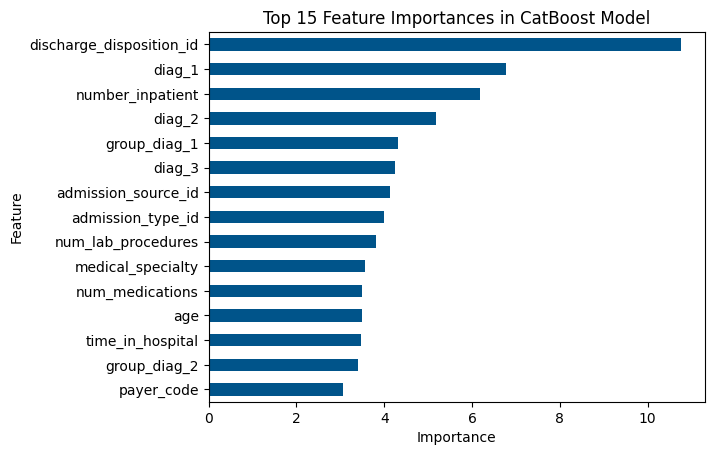

In [16]:
# Extract the 15 most important features and create a Series for plotting
feature_importances = pd.Series(CB1.feature_importances_, index=X_raw_train.columns).nlargest(15)

# Plot the feature importances
feature_importances.plot(kind='barh', color=COLOR_DARK)
plt.gca().invert_yaxis()
plt.title('Top 15 Feature Importances in CatBoost Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

The feature importance plot above reveals that the most influential predictors are `discharge_disposition_id`, `diag_1`, and `number_inpatient`, which exert a significant impact. Additionally, the additional diagnoses, along with admission-related variables such as `medical specialty`, the patient's age as well as the patient utilization history such as `num_lab_procedures`, `num_medications`, `time_in_hospital`, are highlighted as key features.

We proceed to evaluate the performance of our CatBoost model against the validation set, using the area under the Receiver Operating Characteristic Curve (AUC) as our chosen evaluation metric (see above).

In [17]:
# Calculate the AUC score using the model's prediction probabilities for the positive class
auc_CB1 = roc_auc_score(y_val, CB1.predict_proba(X_raw_val)[:, 1])

# Print the validation AUC
print(f'The validation AUC of the CatBoost model with standard hyperparameters is: {auc_CB1:.6f}')

The validation AUC of the CatBoost model with standard hyperparameters is: 0.707713


In summary, Part A established a solid baseline for our binary classification task utilizing a CatBoost model with minimal data preparation and without adjustment of its hyperparameters. This is already a complex model, but it is very easy to build and is known for its high predictive power with default parameters. This benchmark serves as a reference point to assess the value of the more elaborate models constructed in the subsequent sections.

<hr style="width:50%; margin-left:25% !important; margin-right:25% !important;" />

##  <font color='red'> Task PT2: Logistic Regression and Feature Analysis [Learning objectives: 2.2, 5.1 — Points: 10] </font>

Based on the CSN notebook (Part B), the following adjustments must be made:

* a) In Section 2.1, perform only the necessary operations. Which parts can be commented out, and why?
* b) For the logistic regression in Section 2.2, follow this approach: Refer to the feature importance list of CatBoost and construct a model with at least five features. Pay attention to the measurement scale of the
features. Where do problems occur, and what are the possible explanations?
* c) In Section 2.3, only relevant parts need to be addressed. Which parts can be commented out, and why?
* d) The analysis of categorical features in Section 3.1 should be limited to `group_diag_1`, `group_diag_2`, `group_diag_3`, `age`, `medical_specialty`, `payer_code` und `discharge_disposition_id` zu beschränken.
* e) The analysis of numerical features in Section 3.2 should consider `number_outpatient`, `number_inpatient`, `num_procedures`, `num_lab_procedures`, `num_medications`, `time_in_hospital`, `number_emergency` and `number_diagnoses`.

- Section 3.3 as well as Section 4 (Enhancing CatBoost’s Performance with New Features) are not considered at this point.
- Section 5 is not considered.

* f) Execute Section 6:
    - In Section 6.3, adjust `non_event_factor` and provide a justification for this adjustment.
    - After Section 6.4, insert a new Section 6.5, in which the results of the models so far are compared.
Consult Section 4.2 of the CSN notebook for guidance.

__Solution:__

<h1 id="partb"
    style="font-size:22px; font-weight: 500; background-color: #E6E6E6; color: black; height: 50px; line-height: 46px; padding-left: 14px;">
    Part B: Generating Insights from Data and Modeling
    <a class="anchor-link"
       href="#partb"
       target="_self"
       rel=" noreferrer nofollow">
    </a>
</h1>

Part B focuses on refining our machine learning strategy to extract valuable insights. We start with a thorough examination of logistic regression, a cornerstone of actuarial analytics, in its classical unregularized form. We then move on to a targeted exploratory data analysis and feature engineering to enhance our models' predictive power. An emphasis on model explainability is also included. To set the stage for the advanced modeling techniques in Part C, we wrap up with key preprocessing activities: encoding, scaling, and subsampling.

<h1 id="a02"
    style="font-size:18px; font-weight:bold;">
    2. Logistic Regression: A Classical Approach to Classification
    <a class="anchor-link"
       href="#a02"
       target="_self"
       rel=" noreferrer nofollow">
    </a>
    <hr style="border: none; border-top: 3px solid black; margin-top: 10px;">
</h1>

In this section, we dive into logistic regression, a classical and foundational technique in binary classification tasks. Since this method cannot deal with missing feature values, we start by imputing missing numerical values by median values. We then implement and evaluate a low-parameter classical logistic regression model. Following this, we refit the CatBoost model based on the modified datasets, compare the new model's performance with that of the benchmark model and interpret the result.

<h2 style="font-size:16px; font-weight:bold;">2.1 Preparing the data: Imputing missing numbers with median</h2>

In this subsection, we address the challenge of missing data by imputing these missing values, an essential step since logistic regression requires complete datasets to accurately calculate predictions and model parameters. We have already imputed missing values for categorical features with a distinct category in Subsection 1.3. For numerical features, we choose the median due to its robustness to outliers and its effectiveness in preserving the distribution of skewed datasets. Although median imputation may reduce data variability and possibly introduce bias if the missing data is not random, its simplicity offers a practical approach for setting up a baseline model in binary classification tasks. The code snippet below demonstrates how we impute missing values in numerical features using the median calculated from the training data to prevent data leakage.

<span style="color: green">Since our dataset contains no `NA` values, we comment out some of the following code lines acordingly and retain it for potential future use in other scenarios.</span>

In [18]:
# # Identify numerical features
# numerical_features = list(X_raw_train.select_dtypes(exclude=['object']).columns)

# Copy the Input Data
df_pre = df_raw.copy()

# # Replace missing values for numeric features by median value from the training data
# for col in numerical_features:
#     median_value = X_raw_train[col].median()
#     df_pre[col] = df_pre[col].fillna(median_value)

# Check for remaining missing values:
num_missing = df_pre.isnull().sum().sum()
print(f"\nNumber of missing values after imputation: {num_missing}")


Number of missing values after imputation: 0


While our CatBoost model had no problems with very rare feature values, these initially prevented the upcoming logistic regression from converging. Therefore, we replace the extremely rare values with unknown gender (XNA) with the value “F”.

<span style="color: green">Since this data cleaning process was completed in Part I, we comment out the following code.</span>

In [19]:
# # Replace very rare values
# print("\nGender_Frequency: ", df_pre.CODE_GENDER.value_counts())
# df_pre.loc[df_pre["CODE_GENDER"] != "M", "CODE_GENDER"] = "F"

As performed previously in Subsection 1.4, we will proceed to divide our preprocessed dataset into separate training, validation, and testing sets accordingly. This crucial step, essential for training, fine-tuning, and evaluating our machine learning models, ensures that our model can be validated and tested on data that it has not seen during the training process.

In [20]:
# Constants for data split ratios
TRAIN_RATIO = 0.7
VAL_TEST_RATIO = 0.5  # Splitting the remaining 30% equally into validation and test

# Separate the features (X) and the target (y) after preprocessing
X_pre = df_pre.drop(['TARGET'], axis=1)
y_pre = df_pre['TARGET']

# Split the preprocessed dataset into a training set and a combined validation and test set
X_pre_train, X_pre_val_test, y_pre_train, y_pre_val_test = train_test_split(X_pre, y_pre, train_size=TRAIN_RATIO, random_state=RANDOM_SEED)

# Further split the combined validation and test set into separate validation and test sets
X_pre_val, X_pre_test, y_pre_val, y_pre_test = train_test_split(X_pre_val_test, y_pre_val_test, test_size=VAL_TEST_RATIO, random_state=RANDOM_SEED)

# Verify the dimensions of the training, validation, and test sets by displaying (rows, columns)
print(f"Preprocessed training set dimensions (rows, columns):   {X_pre_train.shape}")
print(f"Preprocessed validation set dimensions (rows, columns): {X_pre_val.shape}")
print(f"Preprocessed test set dimensions (rows, columns):       {X_pre_test.shape}")

Preprocessed training set dimensions (rows, columns):   (33425, 50)
Preprocessed validation set dimensions (rows, columns): (7163, 50)
Preprocessed test set dimensions (rows, columns):       (7163, 50)


<h2 style="font-size:16px; font-weight:bold;">2.2 Logistic regression implementation: Fitting and performance evaluation</h2>

Preparing for a logistic regression analysis that echoes R's formula-based modeling style, we merge the features and target variable into a single dataframe. This setup facilitates the use of statsmodels' formula API to define and fit the logistic regression model succinctly. Mindful of potential overfitting and convergence issues, we strategically select only the top several features out of the original 50, guided by their importance rankings determined by CatBoost in Subsection 1.5. Once the model has been fitted, we provide a comprehensive overview of the logistic regression results to facilitate interpretation and analysis.

Refer to the feature importance list of CatBoost, we exclude the diagnosis variables `diag_x` and `medical_specialty` due to their high cardinality, which may hinder logistic regression convergence. We use only `group_diag_1`, omitting `group_diag_2` and `group_diag_3` for the sake of interpretability. A preliminary analysis suggests that including the latter two does not significantly improve model performance.

While we include `admission_source_id` and `num_medications`, we exclude `admission_type_id` resp. `time_in_hospital` due to their strong correlations with the included variables, as verified in Part I. Furthermore, we include `number_diagnoses` in our model, as it ranks among the top 10 features in the XGBoost feature importance plot from Part I. Finally, we exclude `payer_code`, as it does not contribute to improving the model's performance.

Hence, a total of <span style="color: green">eight</span> features are selected to construct our logistic regression model.

In [21]:
# Combine features and target variable into a single dataframe for formula-based modeling
Xy_pre_train = X_pre_train.copy()
Xy_pre_train['TARGET'] = y_pre_train 

# Start timer to calculate the running time of training the logistic regression model
start_time = time.time()

# Define the logistic regression model using statsmodels' formula API and fit it to the training data
LR1 = smf.logit(formula="TARGET ~ discharge_disposition_id + group_diag_1 + number_inpatient \
                         + admission_source_id + num_lab_procedures + age + \
                                 num_medications + number_diagnoses", 
                data=Xy_pre_train).fit()

# Calculate and print the running time in seconds
elapsed_time_LR1 = time.time() - start_time
print(f"Elapsed time (sec): {elapsed_time_LR1:.2f}")

# Display a summary of the logistic regression model results
print(LR1.summary())

Optimization terminated successfully.
         Current function value: 0.365714
         Iterations 8
Elapsed time (sec): 1.27
                           Logit Regression Results                           
Dep. Variable:                 TARGET   No. Observations:                33425
Model:                          Logit   Df Residuals:                    33378
Method:                           MLE   Df Model:                           46
Date:                Tue, 13 May 2025   Pseudo R-squ.:                 0.05995
Time:                        10:43:32   Log-Likelihood:                -12224.
converged:                       True   LL-Null:                       -13004.
Covariance Type:            nonrobust   LLR p-value:                1.047e-296
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          -4.068

**Where feature measurement scale matters in our logistic regression:**

Note that the features we used are either categorical or integer. Since categorical features are one-hot encoded automatically during logistic regression and one-hot encoded features are already in {0, 1}, there is no issue regarding measurement scale here and standard-scaling one-hot encoded variables will only ruin interpretability and won't be meaningful. 

However, for integer features such as `number_inpatient`, `num_lab_procedures`, and `num_medications`, as for any numeric features, measurement scaling plays a crucial role in training linear models, especially if the values vary widely across features. For example, while `number_inpatient` varies between 0 and 12, `num_lab_procedures` has a larger range from 0 to above 130.

Logistic regression is a **linear model**, without scaling, problems arise can be in:

1. Model Convergence and Optimization
   
   Logistic regression uses **gradient descent** or similar optimization techniques. If features vary greatly in scale (e.g., one feature ranges from [0, 1], another from [0, 1000]), the optimization landscape becomes distorted, and convergence may be slower, unstable, or even fail completely in some optimization solvers such as `liblinear`.

2. Regularization Sensitivity
   
   If some common regularization techniques are used such as **L1 (Lasso)** or **L2 (Ridge)**, scaling is crucial since regularization penalizes large coefficients. If a feature has a larger scale and hence a smaller coefficient, it can dominate the penalty, making the model biased toward it even if it is not more informative.

3. Coefficient Interpretability

   Coefficients in logistic regression represent the **change in log-odds per unit change in a feature**. Without standardization, interpreting these coefficients can be misleading. For example, a coefficient of 1 on a feature ranging from [0, 1] may have a much greater impact than a coefficient of 0.001 on a feature ranging from [0, 1000], even though their raw values suggest otherwise. The difference in scale can obscure the true importance of the features.

Now that our logistic regression model is trained, we evaluate its performance on the validation set by calculating the AUC, which provides us with a single metric summarizing the model's ability to discriminate between the positive and negative classes.

In [22]:
# Evaluate the performance of the logistic regression model on the validation data
# and calculate the Area Under the Curve (AUC) for the ROC
auc_LR1 = roc_auc_score(y_pre_val, LR1.predict(X_pre_val))

# Print the validation AUC
print(f'The validation AUC of the logistic regression model is: {auc_LR1:.6f}')

The validation AUC of the logistic regression model is: 0.680391


<h2 style="font-size:16px; font-weight:bold;">2.3 Data imputation impact: Re-evaluating CatBoost with median replacement</h2>

At the beginning of this section, we <span style="color: green">proposed</span> imputing missing numerical values using their median; this is in contrast to CatBoost's default behavior of replacing missing values with a minimal value below any observed non-missing value (see https://catboost.ai/en/docs/concepts/algorithm-missing-values-processing), which was implicitly applied in [Section 1](#a01). As this default strategy may not be optimal for all features, we now examine whether median imputation can enhance the performance of our CatBoost model.

<span style="color: green">In our case, as mentioned in [Section 1](#a01), since no missing values `NA` exist in our dataset and hence no changes were made thereafter, we can safely comment out the following code and retain this section for future use.</span>

In [23]:
# # Start timer to calculate the running time of training the CatBoost model with median replacement
# start_time = time.time()

# # Initialize a CatBoostClassifier and fit it to the preprocessed training data
# CB2 = CatBoostClassifier(eval_metric='AUC', random_seed=RANDOM_SEED)
# CB2.fit(X_pre_train, y_train, cat_features=categorical_features, logging_level='Silent')

# # Calculate and print the running time in seconds
# elapsed_time_CB2 = time.time() - start_time
# print(f"Elapsed time (sec): {elapsed_time_CB2:.2f}")

In [24]:
# # Evaluate the performance of the CatBoost model with median replacement on the
# # validation data and calculate the Area Under the Curve (AUC) for the ROC
# auc_CB2 = roc_auc_score(y_val, CB2.predict_proba(X_pre_val)[:,1])
# print(f'The validation AUC of the CatBoost model with median replacement is:   {auc_CB2:.6f}')
# print(f'The validation AUC of the CatBoost model with minimum replacement was: {auc_CB1:.6f}')

<!-- Our evaluation reveals a comparable validation AUC for the CatBoost model with both median and minimal value imputation of missing numerical data. Given CatBoost's use of randomness, slight performance variations between the two methods could occur on different runs. -->

<h1 id="a03"
    style="font-size:18px; font-weight:bold;">
    3. Exploratory Data Analysis and Feature Engineering
    <a class="anchor-link"
       href="#a03"
       target="_self"
       rel=" noreferrer nofollow">
    </a>
    <hr style="border: none; border-top: 3px solid black; margin-top: 10px;">
</h1>

In Section 3, we conduct a focused Exploratory Data Analysis (EDA), analyzing the dataset's most significant categorical and numerical variables, and then explore feature engineering to conceive new attributes with the potential to elevate our models' predictive capabilities. Furthermore, we will concentrate on a selection of pivotal numerical features identified in Subsection 1.5, along with a handful of categorical features of particular interest.

<h2 style="font-size:16px; font-weight:bold;">3.1 Analysis of categorical features</h2>

First, we examine the key categorical variables
 - group_diag_1, 
 - group_diag_2, 
 - group_diag_3, 
 - age,
 - medical_specialty, 
 - payer_code, and
 - discharge_disposition_id, 

to gauge their influence on the risk of hospital readmission among diabetic patients. Our analysis involves:

1. Creating stacked bar charts to contrast patient counts (with the y-axis set to a logarithmic scale) and percentage distributions across different categories with respect to the target outcome.
2. Comparing the raw number of readmissions to the proportion within each category to uncover potential predictive patterns.

By examining both the count and percentage distributions side by side, we can better understand how each categorical feature correlates with the likelihood of a diabetic patient being readmitted in less than 30 days.

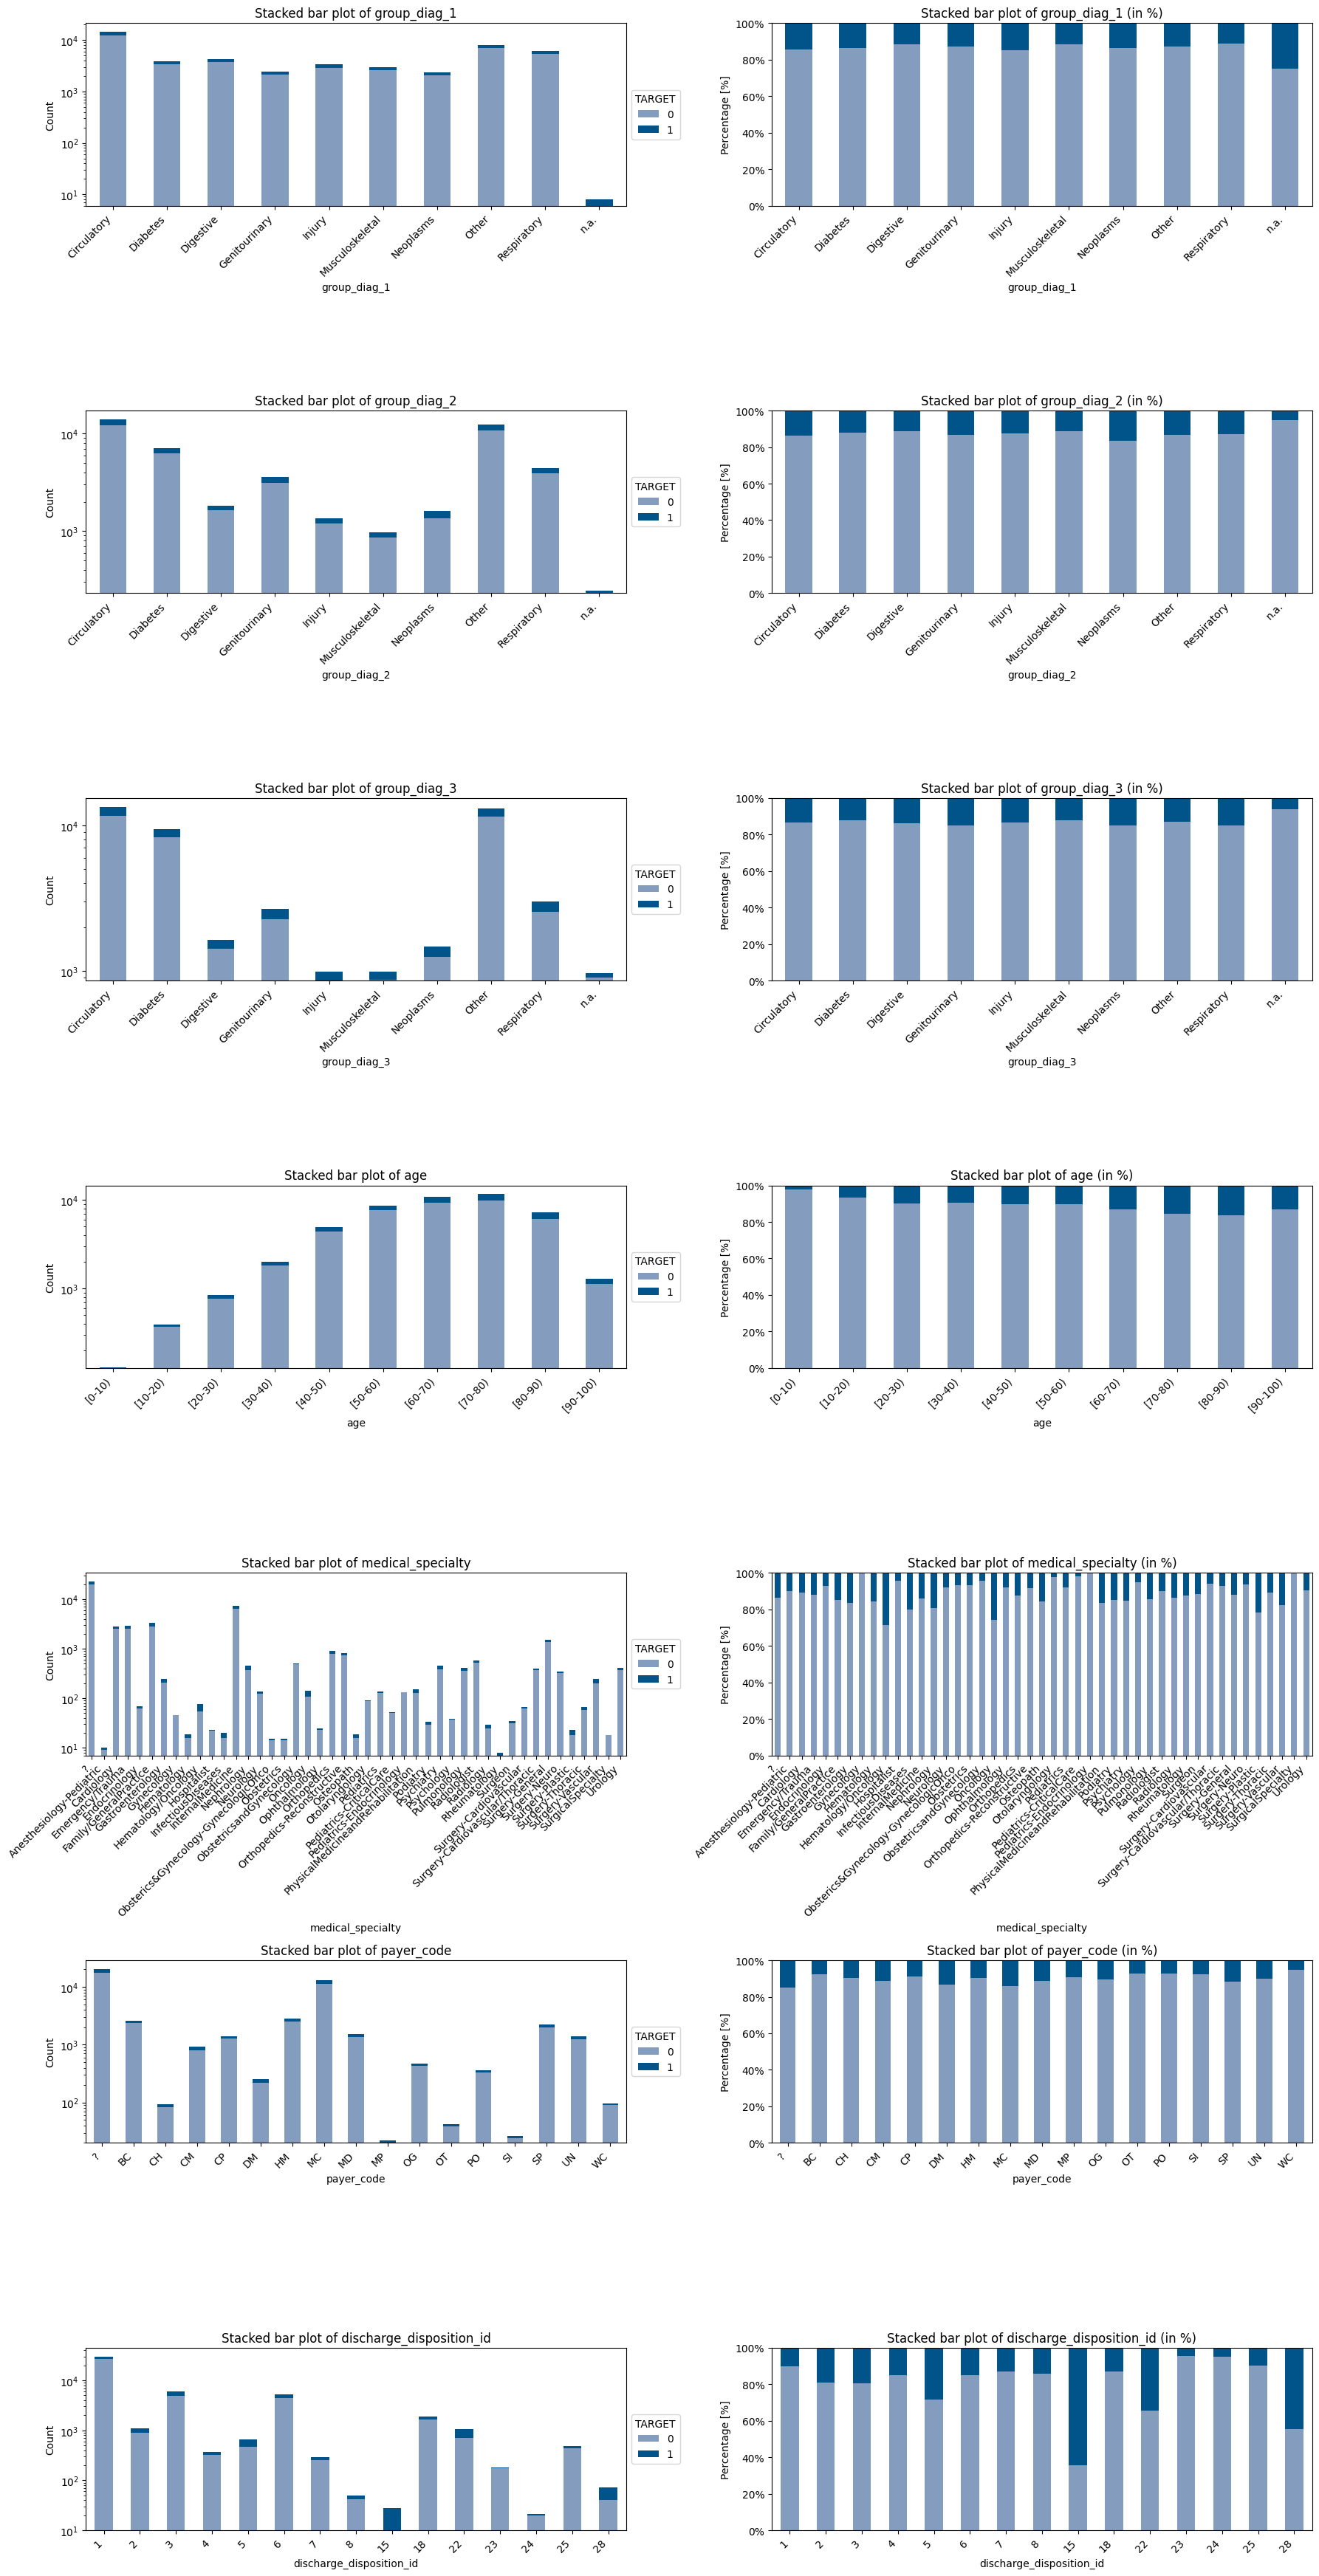

In [25]:
# List of selected categorical features to analyze
selected_categorical_features = ['group_diag_1', 'group_diag_2', 'group_diag_3', 
                                 'age', 'medical_specialty', 'payer_code', 'discharge_disposition_id']

# Number of rows/columns for the subplot grid
n_cols = 2  # doubled to fit count and percentage plots side by side
n_rows = len(selected_categorical_features)  # one row for each feature

# Set up the matplotlib figure
plt.figure(figsize=(n_cols * 9, n_rows * 5))

# Loop through the number of categorical features
for idx, feature in enumerate(selected_categorical_features):
    # Create a crosstab for stacked bar plot structure
    ctab = pd.crosstab(df_pre[feature], df_pre['TARGET'])
    
    # (1st column) add a new subplot iteratively for count values
    ax1 = plt.subplot(n_rows, n_cols, idx * n_cols + 1)
    
    # Create a stacked bar plot for count values
    ctab.plot(kind="bar", stacked=True, color=[COLOR_LIGHT, COLOR_DARK], edgecolor="none", ax=ax1)
    
    # Additional plot settings for count subplot
    ax1.set_title(f'Stacked bar plot of {feature}')
    ax1.set_xlabel(feature)
    ax1.set_ylabel('Count')
    ax1.set_yscale('log') # Set y-axis to log base 10
    ax1.legend(title='TARGET', loc='center left', bbox_to_anchor=(1, 0.5))
    plt.xticks(rotation=45, ha='right')
    
    # (2nd column) add a new subplot iteratively for percentage values
    ax2 = plt.subplot(n_rows, n_cols, idx * n_cols + 2)
        
    # Normalize the crosstab by row and multiply by 100 to convert to percentages
    ctab_normalized = ctab.div(ctab.sum(axis=1), axis=0) * 100
    
    # Create a stacked bar plot for percentage values
    ctab_normalized.plot(kind="bar", stacked=True, color=[COLOR_LIGHT, COLOR_DARK], edgecolor="none", ax=ax2)
    
    # Additional plot settings for percentage subplot
    ax2.set_title(f'Stacked bar plot of {feature} (in %)')
    ax2.set_xlabel(feature)
    ax2.set_ylabel('Percentage [%]')
    ax2.legend().remove()
    plt.xticks(rotation=45, ha='right')
    
    # Make yticks be in percentages for the percentage subplot
    ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:.0f}%".format(int(x))))
    ax2.set_ylim(0, 100)
    
# Preventing subplots from being too close to each other and display the final plot
plt.tight_layout()
plt.show()

Insights from the categorical feature analysis within the **Diabetes 130-US Hospitals (1999-2008)** dataset suggest:

- Diagnostic Groups (`group_diag_1`, `group_diag_2`, `group_diag_3`): While readmission rates (TARGET = 1) are relatively consistent across diagnostic categories, groups such as Neoplasms, Circulatory, and Respiratory exhibit slightly higher readmission rates. In contrast, Diabetes, Digestive, and Musculoskeletal diagnoses are associated with slightly lower rates of readmission.
- Age Groups (`age`): Patient distribution is heavily skewed toward older age groups. Readmission rates generally increase with age, peaking in the [70–80) and [80–90) brackets before declining in the oldest group.
-  Medical Specialty (`medical_specialty`): Although a large portion of data falls under the missing category (`?`), readmission rates vary notably across specialties. Hematology/Oncology and Oncology show the highest readmission rates.
- Payer Code (`payer_code`): Patients covered under DM and MC plans exhibit higher readmission tendencies, whereas those under WC are associated with lower readmission rates.
- Discharge Disposition ID (`discharge_disposition_id`): Readmission rates differ significantly across discharge categories. Dispositions such as `15`, `22`, and `28` are linked to markedly higher readmission rates, while dispositions like `23` and `24` are associated with significantly lower rates.

As with any data-driven insights, statistical validation is advisable before applying these findings.

<h2 style="font-size:16px; font-weight:bold;">3.2 Analysis of numerical features</h2>

Next, we analyze the key numerical variables
 - number_outpatient, 
 - number_inpatient,
 - num_procedures, 
 - num_lab_procedures, 
 - num_medications, 
 - time_in_hospital, 
 - number_emergency, and
 - number_diagnoses, 

to detect patterns related to hospital readmission outcomes. Through Kernel Density Estimation (KDE) plots, we observe the density distribution of each feature for both readmitted and non-readmitted patients. By comparing these distributions, we can identify which numerical predictors might have significant predictive power, a critical step for effective feature engineering and subsequent model building in binary classification tasks.

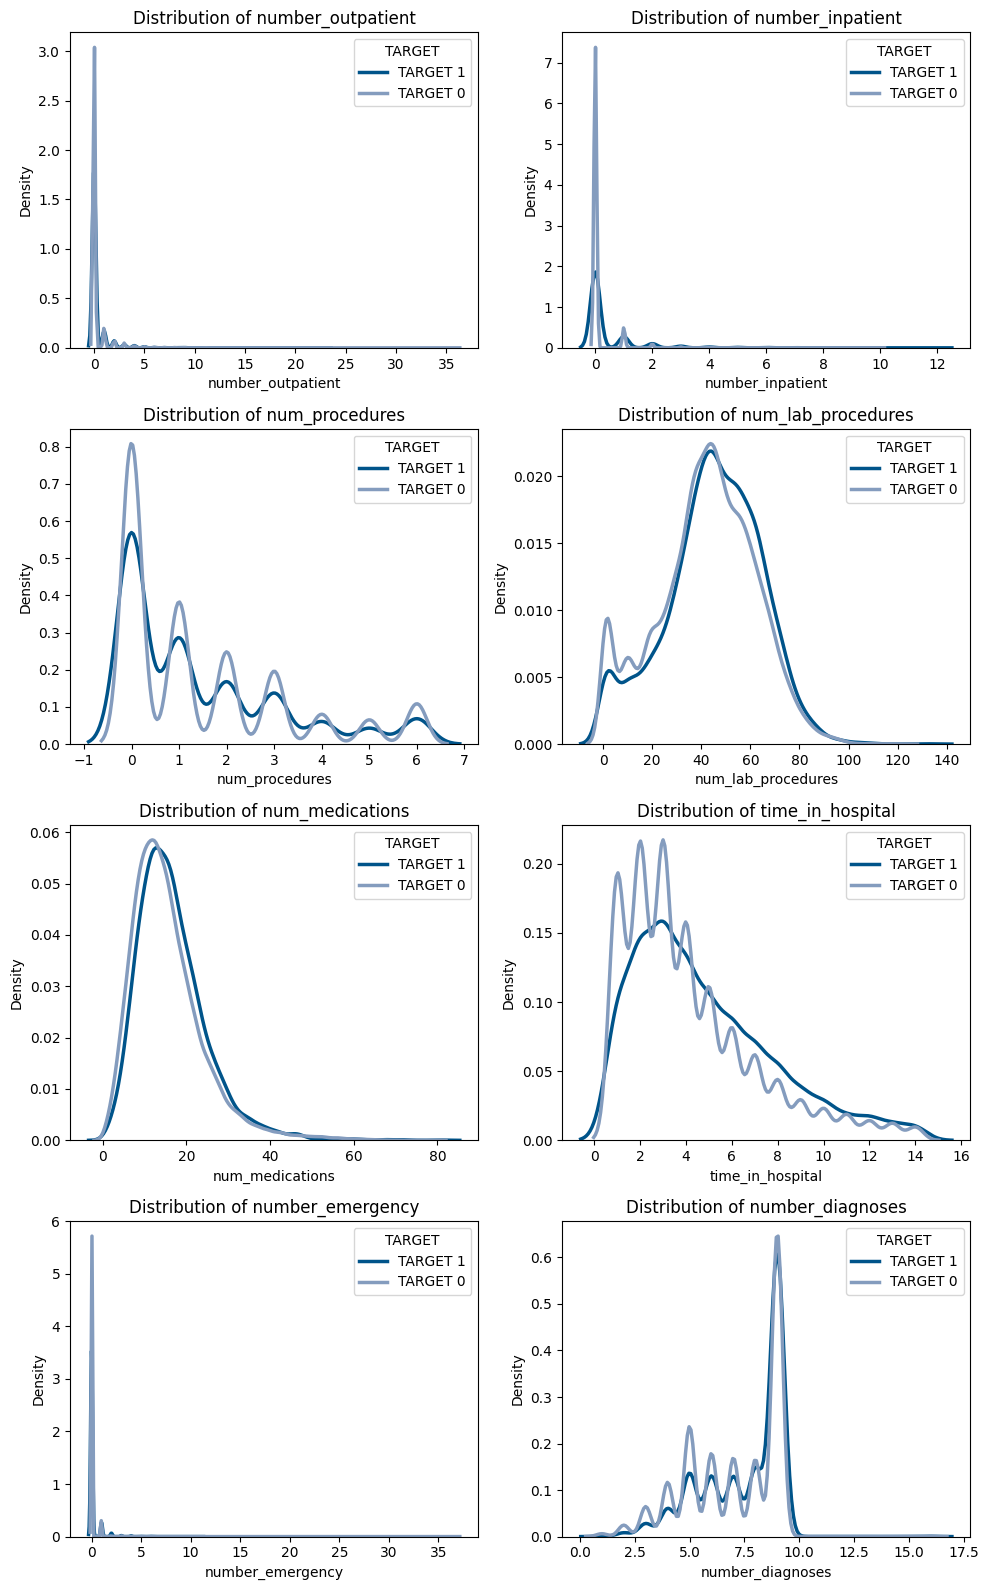

In [26]:
# List of selected numerical features to analyze
selected_numerical_features = ['number_outpatient', 'number_inpatient', 'num_procedures', 'num_lab_procedures', 
                               'num_medications', 'time_in_hospital', 'number_emergency', 'number_diagnoses']

# number of plots, set up the subplot grid
n_plots = len(selected_numerical_features)
n_cols = 2  # adjust the number of columns based on your preference
n_rows = (n_plots + n_cols - 1) // n_cols

# set up the matplotlib figure
plt.figure(figsize=(n_cols * 5, n_rows * 4))

# loop through the list of numerical features
for idx, feature in enumerate(selected_numerical_features):
    ax = plt.subplot(n_rows, n_cols, idx + 1)
    
    # Create a color mapping based on TARGET values assuming values are 0 and 1
    color_mapping = {0: COLOR_LIGHT, 1: COLOR_DARK}
    
    class_vals = df_pre['TARGET'].unique()
    for val in class_vals:
        subset = df_pre[df_pre['TARGET'] == val]
        
        # Draw the KDE for each class
        sns.kdeplot(subset[feature], ax=ax, label=f'TARGET {val}', color=color_mapping[val], linewidth=2.5)
    
    # additional plot settings
    ax.set_title(f'Distribution of {feature}')
    ax.set_xlabel(f'{feature}')
    ax.set_ylabel('Density')
    ax.legend(title='TARGET')

# Preventing subplots from being too close to each other and display the final plot
plt.tight_layout()
plt.show()

The analysis of numerical features within the dataset yields the following key insights:

- `number_inpatient`, `number_emergency`, and `number_outpatient`, which indicate prior hospital visits, are positively correlated with readmission risk, with `number_inpatient` being the strongest predictor. Patients with more frequent prior visits, particularly **inpatient** ones, are more likely to be readmitted.
- `num_procedures`, which represents the number of procedures (excluding lab tests) performed during the encounter, shows little variation between TARGET=0 and TARGET=1. However, TARGET=1 exhibits a slightly heavier right tail.
- `num_lab_procedures` and `num_medications`, indicating the number of lab tests and medications respectively, are slightly skewed toward readmitted patients, suggesting that higher counts may be associated with readmission.
- The distribution of `time_in_hospital`, representing the duration of hospital stay, is right-shifted for TARGET=1 compared to TARGET=0, indicating that longer stays are linked to a higher risk of readmission.
- `number_diagnoses` shows that a slightly higher number of diagnoses is associated with an increased likelihood of readmission.

<span style="color: green">Since the remainder of this session, as well as [Section 4](#a04), is not currently relevant to our use case, we omit them and proceed directly to [Section 6](#a06).</span>

<h1 id="a06"
    style="font-size:18px; font-weight:bold;">
    6. Data Preprocessing: Encoding, Scaling, and Subsampling
    <a class="anchor-link"
       href="#a06"
       target="_self"
       rel=" noreferrer nofollow">
    </a>
    <hr style="border: none; border-top: 3px solid black; margin-top: 10px;">
</h1>

In this section, we concentrate on two essential preprocessing steps: encoding to make categorical data machine-readable, essential for many machine learning algorithms, and scaling to normalize the values of numerical features, aiding in algorithm efficiency. We also tackle class imbalance by using subsampling methods, creating a more balanced training dataset and boosting computational effectiveness for our machine learning models.

<h2 style="font-size:16px; font-weight:bold;">6.1 Encoding categorical data and scaling numerical values</h2>

In general, machine learning models require input data to be in numerical format to perform mathematical computations. However, real-world datasets—such as the one considered here—frequently contain categorical or text data. Hence, encoding is needed to convert this non-numerical data into a numerical form that can be understood and processed by machine learning algorithms.

The two most commonly used encoding methods are the following:

- <u>Label-Encoding</u>: Converts each value in a column to a number. Good for ordinal data, i.e., when categories have an inherent order.

- <u>One-Hot-Encoding</u>: Creates a binary column for each category/label present in the column. This is useful for nominal variables, where the categories don't have any order or priority.

In the following, we will apply One-Hot-Encoding to our dataset in order to make it processable for machine learning methods such as Artificial Neural Nets or XGBoost.

In [27]:
# Output the dimensions of the dataset prior to dummy encoding
print("Shape of the dataset before dummy encoding: ", df_pre.shape) 

# Perform dummy encoding on categorical features, removing the first level to avoid dummy variable trap
df = pd.get_dummies(df_pre, drop_first=True)

# Output the dimensions of the dataset after dummy encoding to show the change
print("Shape of the dataset after dummy encoding: ", df.shape)

Shape of the dataset before dummy encoding:  (47751, 51)
Shape of the dataset after dummy encoding:  (47751, 2249)


In [28]:
# Change columns names (LightGBM does not support special JSON characters in feature names)
new_names = {col: re.sub(r'[^A-Za-z0-9_]+', '', col) for col in df.columns}
new_n_list = list(new_names.values())
new_names = {col: f'{new_col}_{i}' if new_col in new_n_list[:i] else new_col for i, (col, new_col) in enumerate(new_names.items())}
df = df.rename(columns=new_names)
df.head(1)

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,TARGET,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,gender_Male,age_1020,age_2030,age_3040,age_4050,age_5060,age_6070,age_7080,age_8090,age_90100,weight_025,weight_100125,weight_125150,weight_150175,weight_2550,weight_5075,weight_75100,admission_type_id_2,admission_type_id_3,admission_type_id_5,admission_type_id_6,admission_type_id_7,admission_type_id_8,discharge_disposition_id_2,discharge_disposition_id_3,discharge_disposition_id_4,discharge_disposition_id_5,discharge_disposition_id_6,discharge_disposition_id_7,discharge_disposition_id_8,discharge_disposition_id_15,discharge_disposition_id_18,discharge_disposition_id_22,discharge_disposition_id_23,discharge_disposition_id_24,discharge_disposition_id_25,discharge_disposition_id_28,admission_source_id_2,admission_source_id_3,admission_source_id_4,admission_source_id_5,admission_source_id_6,admission_source_id_7,admission_source_id_8,admission_source_id_9,admission_source_id_17,admission_source_id_20,payer_code_BC,payer_code_CH,payer_code_CM,payer_code_CP,payer_code_DM,payer_code_HM,payer_code_MC,payer_code_MD,payer_code_MP,payer_code_OG,payer_code_OT,payer_code_PO,payer_code_SI,payer_code_SP,payer_code_UN,payer_code_WC,medical_specialty_AnesthesiologyPediatric,medical_specialty_Cardiology,medical_specialty_EmergencyTrauma,medical_specialty_Endocrinology,medical_specialty_FamilyGeneralPractice,medical_specialty_Gastroenterology,medical_specialty_Gynecology,medical_specialty_Hematology,medical_specialty_HematologyOncology,medical_specialty_Hospitalist,medical_specialty_InfectiousDiseases,medical_specialty_InternalMedicine,medical_specialty_Nephrology,medical_specialty_Neurology,medical_specialty_ObstericsGynecologyGynecologicOnco,medical_specialty_Obstetrics,medical_specialty_ObstetricsandGynecology,medical_specialty_Oncology,medical_specialty_Ophthalmology,medical_specialty_Orthopedics,medical_specialty_OrthopedicsReconstructive,medical_specialty_Osteopath,medical_specialty_Otolaryngology,medical_specialty_Pediatrics,medical_specialty_PediatricsCriticalCare,medical_specialty_PediatricsEndocrinology,medical_specialty_PhysicalMedicineandRehabilitation,medical_specialty_Podiatry,medical_specialty_Psychiatry,medical_specialty_Psychology,medical_specialty_Pulmonology,medical_specialty_Radiologist,medical_specialty_Radiology,medical_specialty_Rheumatology,medical_specialty_Surgeon,medical_specialty_SurgeryCardiovascular,medical_specialty_SurgeryCardiovascularThoracic,medical_specialty_SurgeryGeneral,medical_specialty_SurgeryNeuro,medical_specialty_SurgeryPlastic,medical_specialty_SurgeryThoracic,medical_specialty_SurgeryVascular,medical_specialty_SurgicalSpecialty,medical_specialty_Urology,diag_1_11,diag_1_110,diag_1_112,diag_1_115,diag_1_117,diag_1_133,diag_1_135,diag_1_136,diag_1_141,diag_1_142,diag_1_143,diag_1_146,diag_1_147,diag_1_149,diag_1_150,diag_1_151,diag_1_152,diag_1_153,diag_1_154,diag_1_155,diag_1_156,diag_1_157,diag_1_158,diag_1_160,diag_1_161,diag_1_162,diag_1_163,diag_1_164,diag_1_170,diag_1_171,diag_1_172,diag_1_173,diag_1_174,diag_1_175,diag_1_179,diag_1_180,diag_1_182,diag_1_183,diag_1_184,diag_1_185,diag_1_187,diag_1_188,diag_1_189,diag_1_191,diag_1_192,diag_1_193,diag_1_194,diag_1_195,diag_1_196,diag_1_197,diag_1_198,diag_1_199,diag_1_200,diag_1_201,diag_1_202,diag_1_203,diag_1_204,diag_1_205,diag_1_207,diag_1_208,diag_1_210,diag_1_211,diag_1_212,diag_1_214,diag_1_215,diag_1_216,diag_1_218,diag_1_219,diag_1_220,diag_1_223,diag_1_225,diag_1_226,diag_1_227,diag_1_228,diag_1_229,diag_1_230,diag_1_233,diag_1_235,diag_1_236,diag_1_237,diag_1_238,diag_1_239,diag_1_240,diag_1_241,diag_1_242,diag_1_244,diag_1_245,diag_1_246,diag_1_250,diag_1_25001,diag_1_25002,diag_1_25003,diag_1_2501,diag_1_25011,diag_1_25012,diag_1_25013,diag_1_2502,diag_1_25021,diag_1_25022,diag_1_25023,diag_1_2503,diag_1_25031,diag_1_25032

In [29]:
# Generate the samples once again

# Split dataset in 70% training, 15% validation and 15% test and devide into feature matrix x and label y
X = df.drop(['TARGET'], axis=1)
y = df.TARGET
X_train, X_valtest, y_train, y_valtest = train_test_split(X, y, train_size=0.70, random_state=RANDOM_SEED)
X_val, X_test, y_val, y_test = train_test_split(X_valtest, y_valtest, test_size=0.50, random_state=RANDOM_SEED)
print('Sample sizes for training, validation and test: ', X_train.shape, X_val.shape, X_test.shape)

Sample sizes for training, validation and test:  (33425, 2248) (7163, 2248) (7163, 2248)


Scaling is vital in machine learning for consistency, improved performance, and meeting algorithm requirements:

1. <u>Uniformity</u>: Diverse features can have varying scales, such as age ranging from 0 to 100 and income spanning thousands to millions. This can mislead algorithms into overemphasizing features with larger ranges.

2. <u>Efficiency</u>: Algorithms such as Gradient Descent and K-Nearest-Neighbors (KNN) benefit from features on a similar scale, resulting in better performance and quicker convergence. For example, KNN is heavily influenced by features with larger magnitudes.

3. <u>Normalization Requirement</u>: Certain machine learning algorithms, such as neural networks, require inputs to be scaled for model training to effectively proceed.

Typical scaling techniques include Min-Max Scaling, which adjusts features to a 0 to 1 range, and Standard Scaling, which sets features to zero mean and unit variance. The appropriate scaling approach is contingent upon the algorithm utilized and data characteristics. We will employ Standard Scaling in our analysis.

In [30]:
# Generate list: feature names  
feature_names=list(X.columns)

# Feature scaling using StandardScaler based on training data distributions 
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns = feature_names)
X_val = pd.DataFrame(scaler.transform(X_val), columns = feature_names)

<span style="color: green">We note that standard scaling was also applied to the one-hot encoded categorical features, which is uncommon in practice, as these features are already binary (i.e., values in {0, 1}). However, due to the presence of an intercept in the model, this transformation has no effect on the model's ability to learn and thus does not impact performance.</span>

<h2 style="font-size:16px; font-weight:bold;">6.2 Do encoding and scaling affect the benchmark model?</h2>

In [31]:
# Repeat CB with one-hot-encoded and scaled data
start_time = time.time()

CB4 = CatBoostClassifier(eval_metric='AUC', random_seed=RANDOM_SEED) 
CB4.fit(X_train, y_train, logging_level='Silent')

# Calculate and print the running time in seconds
elapsed_time_CB4 = time.time() - start_time
print(f"Elapsed time (sec): {elapsed_time_CB4:.2f}")

Elapsed time (sec): 22.69


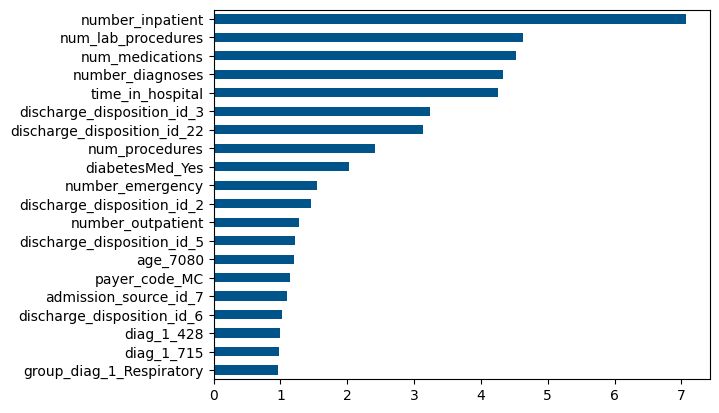

In [32]:
# CatBoost: Plot most the top 20 most important features
pd.Series(CB4.feature_importances_, index=X_train.columns).nlargest(20).plot(kind='barh', color=COLOR_DARK).invert_yaxis()
plt.show()

Compared to the corresponding feature importance plot in [Subsection 1.5](#a01), we now observe that all of the top five features are numerical. However, this does not imply that the previously identified top categorical features are unimportant; rather, their importance is now distributed across multiple columns due to one-hot encoding. As a result, their individual contributions may appear diminished in the feature importance ranking, which can complicate interpretation and feature selection in models that rely on such metrics.

To better assess the overall importance of a categorical variable, one can aggregate the importance scores of its one-hot encoded columns or use alternative encoding methods (e.g., embeddings in neural networks which we will study later) that retain categorical structure and allow more direct interpretation.

In [33]:
# Calculate and dispay the model AUC  
auc_CB4 = roc_auc_score(y_val, CB4.predict_proba(X_val)[:,1])
print('The validation AUC of the CatBoost model after encoding and scaling is:   {:.6f}'.format(auc_CB4))
print('The validation AUC of the CatBoost model before encoding and scaling was: {:.6f}'.format(auc_CB1))

The validation AUC of the CatBoost model after encoding and scaling is:   0.702311
The validation AUC of the CatBoost model before encoding and scaling was: 0.707713


In [34]:
print(f"Elapsed time of the CatBoost model after encoding and scaling (sec):  {elapsed_time_CB4:.2f}")
print(f"Elapsed time of the CatBoost model before encoding and scaling (sec): {elapsed_time_CB1:.2f}")

Elapsed time of the CatBoost model after encoding and scaling (sec):  22.69
Elapsed time of the CatBoost model before encoding and scaling (sec): 157.66


**Summary and interpretation**: Although the encoding of the categorical data increased the number of features by a factor of 45 (50 before vs. 2248 after encoding), the training time of CatBoost decreased substancially while the AUC level decreased just slightly. Apparently, the direct use of the categorical features within CatBoost leads to a greatly increased computational effort, which, however, only leads to a minimal improvement in the prediction quality.

<h2 style="font-size:16px; font-weight:bold;">6.3 Subsampling the training data</h2>

Fortunately, readmission is a rare event and thus the dataset is highly imbalanced with respect to our `TARGET` variable. Currently, one readmission is offset by an average of 6.6 non-readmission in the training data. We would now like to investigate whether this overweight can be reduced to, for example, 1:2 without a deterioration in the resulting model quality and whether the reduced data volume can accelerate model training.

In [35]:
non_event_factor = 2 # thus the event rate should be 33.3% (instead of 13.1%) 

# Save complete training data
X_train_all = X_train.copy(deep=True)
y_train_all = y_train.copy(deep=True)

In [36]:
# Subsampling: enhance event rate to 1:nov_event_factor
Xs = pd.concat([X_train.reset_index(drop=True), y_train.reset_index(drop=True)], axis=1)
Xs = pd.concat([Xs[Xs['TARGET']==1], Xs[Xs['TARGET']==0].sample(
           n = non_event_factor * len(Xs[Xs['TARGET']==1] ), random_state=RANDOM_SEED)],axis=0).sort_index(ascending=True)

# Over-write complete training data with subsample
X_train = Xs.drop(columns=["TARGET"])
y_train = Xs["TARGET"]

print("\nSize of training data set after subsampling: ", X_train.shape)
print("\nTARGET-distribution after subsampling:\n", y_train.value_counts())
print("\nReduction of data volume (%): ", round((len(y_train)/len(y_train_all)-1)*100))


Size of training data set after subsampling:  (13176, 2248)

TARGET-distribution after subsampling:
 TARGET
0    8784
1    4392
Name: count, dtype: int64

Reduction of data volume (%):  -61


<h2 style="font-size:16px; font-weight:bold;">6.4 Does subsampling affect the benchmark model?</h2>

In [37]:
# Repeat CB with subsampled data
start_time = time.time()

CB5 = CatBoostClassifier(eval_metric='AUC', random_seed=RANDOM_SEED) 
CB5.fit(X_train, y_train, logging_level='Silent')

# Calculate and print the running time in seconds
elapsed_time_CB5 = time.time() - start_time
print(f"Elapsed time (sec): {elapsed_time_CB5:.2f}")

Elapsed time (sec): 21.06


In [38]:
# Calculate and dispay the model AUC 
auc_CB5 = roc_auc_score(y_val, CB5.predict_proba(X_val)[:,1])
print('The validation AUC of the CatBoost model with subsampled data is: {:.6f}'.format(auc_CB5))

The validation AUC of the CatBoost model with subsampled data is: 0.699061


In [39]:
# Calculate relative performance
print("Reduction of training time (%): ", round((elapsed_time_CB5/elapsed_time_CB4-1)*100))
print("Improvment in AUC score (%): ", round((auc_CB5/auc_CB4-1)*100, 2))

Reduction of training time (%):  -7
Improvment in AUC score (%):  -0.46


**Summary and conclusion**: Using a 1:2 ratio (i.e., `non_event_factor` of 2) reduces CatBoost training time by at least 20%, with minimal impact on model performance. Thus, subsampling training data can be an effective strategy for speeding up model training, particularly during hyperparameter tuning.

While one might argue that this extreme undersampling of the majority class could discard valuable information. However, the performance observed on the validation data suggests that this is not a concern in our case.

Moving forward, we focus on this subsampled dataset, which reflects an increased event rate of 33.3%.

<h2 style="font-size:16px; font-weight:bold;">6.5 Model evaluation and comparison</h2>

Prepare model comparison:

In [40]:
# Data structures for model names, AUC, as well as training time
mname = []
mauc = []
mtrainingtime = []

dict = {'Model name': mname,'AUC': mauc, 'Training time': mtrainingtime}

In [41]:
# Store name and AUC of prevoisly fitted models 
mname.append("CB1_quick")
mauc.append(auc_CB1)
mtrainingtime.append(elapsed_time_CB1)
mname.append("LR1_select")
mauc.append(auc_LR1)
mtrainingtime.append(elapsed_time_LR1)
mname.append("CB4_OHE")
mauc.append(auc_CB4)
mtrainingtime.append(elapsed_time_CB4)
mname.append("CB5_after subsampling")
mauc.append(auc_CB5)
mtrainingtime.append(elapsed_time_CB5)

In [42]:
def plot_model_performance(d, x1, x2, t): 
    df_eval = pd.DataFrame(d)
    
    # Create a figure with 1 row and 2 columns
    plt.figure(figsize=(20, 6))

    # First subplot (left): Model AUCs
    ax1 = plt.subplot(1, 2, 1)
    ax1.set_title(" Model evaluation (AUC): " + t)
    sns.barplot(data = df_eval, x = "AUC", y = "Model name", color = COLOR_DARK)
    ax1.set_xlim(x1, x2)
    
    # Second subplot (right): Model training times
    ax2 = plt.subplot(1, 2, 2)
    ax2.set_title(" Model training time in second: " + t)
    sns.barplot(data = df_eval, x = "Training time", y = "Model name", color = COLOR_DARK)
    ax2.set_ylabel("")
    
    plt.tight_layout()
    plt.show()

Compare Model Performance (AUC - higher is better):

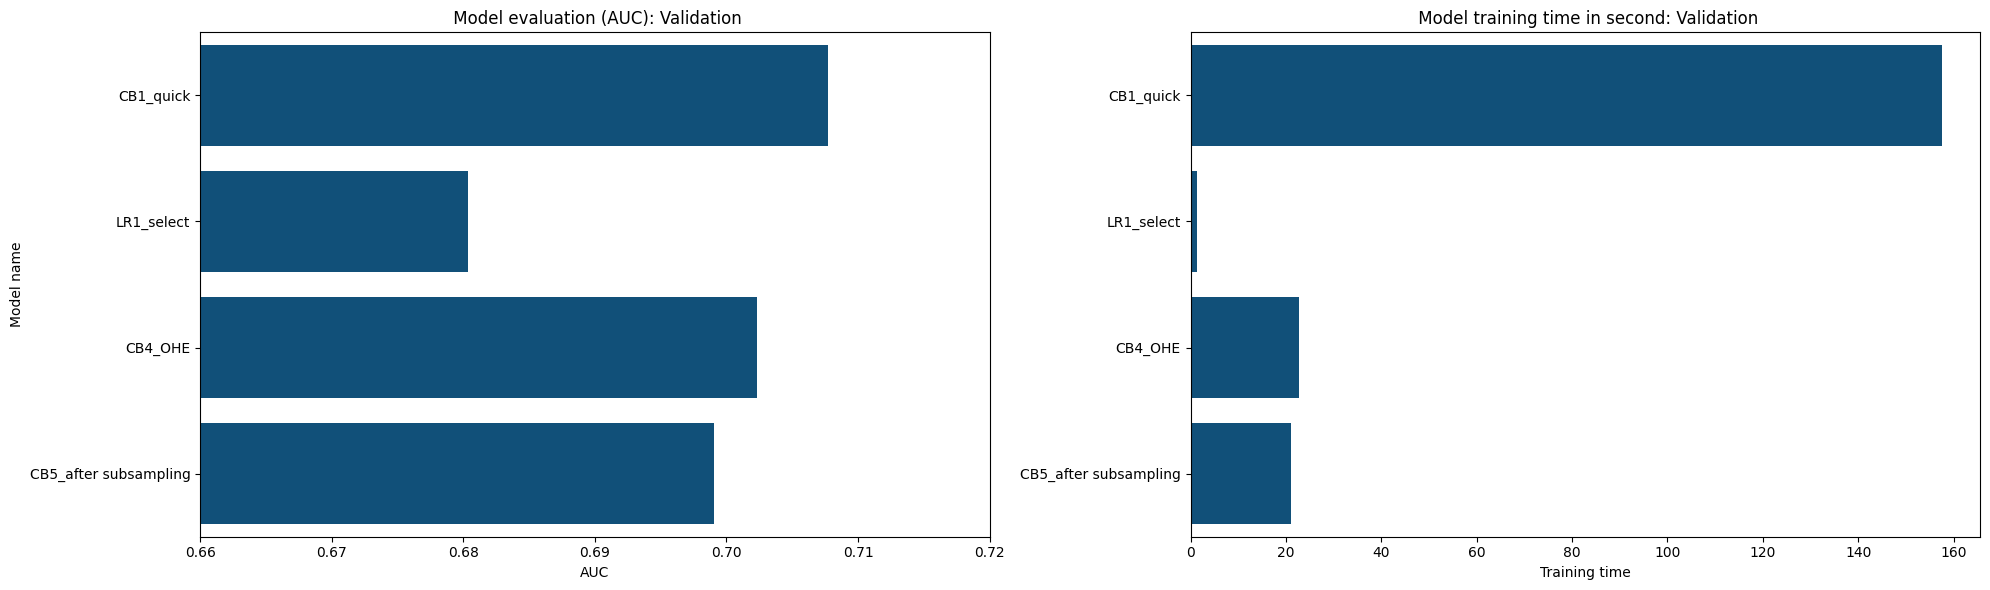

In [43]:
plot_model_performance(dict, 0.66, 0.72, "Validation")

**Summary and conclusion**: Among the models evaluated, the benchmark model consistently delivers the highest predictive performance, although it incurs significantly longer training times due to its computational complexity. Notably, the application of feature encoding as well as data subsampling for balancing purposes reduces training time by at least 80%, with no measurable loss in accuracy. Logistic regression, while slightly less accurate, achieves the fastest training time, illustrating a practical trade-off between model complexity and computational efficiency.

##  <font color='red'> Task PT3: Adjusting and Extending Model Optimization [Learning objectives: 5.1 — Points: 3]] </font>

* a) Sections 7 and 8 are not to be processed and must be removed.
* b) Sections 9 and 10 must be processed and adjusted. Configure the settings appropriately based on the
hardware used (CPU/GPU). What modifications should be made to the hyperparameter grids (HP grids)?
Interpret the results.
* c) Section 11 is to be skipped for now.

__Solution:__


<h1 id="partc"
    style="font-size:22px; font-weight: 500; background-color: #E6E6E6; color: black; height: 50px; line-height: 46px; padding-left: 14px;">
    Part C: Tuning and Applying Machine Learning Models
    <a class="anchor-link"
       href="#partc"
       target="_self"
       rel=" noreferrer nofollow">
    </a>
</h1>

Part C is all about harnessing the full potential of our models by:
 - Fine-tuning hyperparameters for the gradient tree boosting model champions CatBoost, LightGBM, and XGBoost;
 - Representing categorical features using embeddings in a neural network and fine-tuning these embeddings;
 - Re-training the previous baseline models with the newly embedded features; and finally,
 - Exploring AutoML, including model ensembles.

Following this, we provide a detailed comparative evaluation using validation and test datasets and explore the application of these models in high-risk domains. To wrap up, we summarize the pivotal insights gleaned from our machine learning exploration. As we draw to a close, we reflect on the key learnings from our machine learning journey.

<span style="color: green">As mentioned earlier, the CPU is sufficient for our task. Additionally, we will adjust the settings and hyperparameter grids accordingly, opting for a more efficient but less aggressive hyperparameter search if needed.</span>

<h1 id="a09"
    style="font-size:18px; font-weight:bold;">
    9. Hyperparameter Optimization in CatBoost
    <a class="anchor-link"
       href="#a09"
       target="_self"
       rel=" noreferrer nofollow">
    </a>
    <hr style="border: none; border-top: 3px solid black; margin-top: 10px;">
</h1>

Now we want to investigate whether we can optimize the learning rate and tree depth of CatBoost by performing a costly cross-validated randomized search (fitting 40 models). 

In the first code block, we are setting the stage for hyperparameter optimization of the CatBoostClassifier model. We define a parameter grid specifying the range of values to be explored for the learning rate and the depth of the trees. Here, `loguniform` is used for the learning rate to sample from a logarithmic distribution, optimizing the search over different scales. Similarly, a list of integers represents possible values for the depth of the trees.

In [44]:
# Define the hyperparameters grid to search
param_grid_CB ={'learning_rate': loguniform(0.01, 0.05), 
                'depth':         [4,5,6,7]}

# Define variables for results reports
sel_params_CB = ['param_learning_rate','param_depth','mean_test_score','rank_test_score']

Following the initial setup, our next code block implements the actual hyperparameter optimization using RandomizedSearchCV, a strategy that randomly samples the parameter space and performs four-fold cross-validation. We choose a reasonable number of iterations (`n_iter=10`) to balance between computation time and thoroughness of the search. The results are captured, including the run time and the best parameters found.

In [45]:
# CatBoostClassifier: Hyper parameter optimization with RandomizedSearchCV
tic = time.time()

CB_rs = RandomizedSearchCV(CatBoostClassifier(iterations=1000, eval_metric='AUC'), param_grid_CB,
                           cv=4, n_iter=10, n_jobs=-1, random_state=RANDOM_SEED, scoring='roc_auc')
CB_rs.fit(X_train, y_train, logging_level='Silent')

# Print the runtime as well as the five best hyper parameter constellations
print("time (sec):" + "%6.0f" % (time.time() - tic))
print("Best hyper parameters:",CB_rs.best_params_)
pd.DataFrame(CB_rs.cv_results_)[sel_params_CB].sort_values("rank_test_score").head()

time (sec):   240
Best hyper parameters: {'depth': 6, 'learning_rate': 0.020941182421473574}


,param_learning_rate,param_depth,mean_test_score,rank_test_score
4,0.020941,6,0.692364,1
1,0.032482,6,0.692006,2
5,0.026312,4,0.691834,3
0,0.036038,6,0.691131,4
2,0.026132,4,0.690959,5


After identifying the best hyperparameters, we use them to fit a new CatBoostClassifier model with the entire training set. This approach leverages the optimized parameters that should theoretically yield a more accurate model.

In [46]:
# CatBoostClassifier: Fit new model on all folds (with best parameters) 
start_time = time.time()
CB6 = CatBoostClassifier(**CB_rs.best_params_, iterations=1000, eval_metric='AUC')
CB6.fit(X_train, y_train, logging_level='Silent')

# Calculate and print the running time in seconds
elapsed_time_CB6 = time.time() - start_time
print(f"Elapsed time (sec): {elapsed_time_CB6:.2f}")

Elapsed time (sec): 18.48


Finally, we evaluate the performance of the tuned model by calculating the AUC score using the validation set.

In [47]:
# Calculate and dispay the model AUC 
auc_CB6 = roc_auc_score(y_val, CB6.predict_proba(X_val)[:,1])
print('The validation AUC of the CatBoost model with tuned hyperparameters is: {:.6f}'.format(auc_CB6))
print('Comparison: The val. AUC of the CatBoost model with subsampled data is: {:.6f}'.format(auc_CB5))

The validation AUC of the CatBoost model with tuned hyperparameters is: 0.700497
Comparison: The val. AUC of the CatBoost model with subsampled data is: 0.699061


Although it requires drastically more training time, the performance of the tuned model is fortunately slightly better. 

<h1 id="a10"
    style="font-size:18px; font-weight:bold;">
    10. HP-Tuning LightGBM and XGBoost
    <a class="anchor-link"
       href="#a10"
       target="_self"
       rel=" noreferrer nofollow">
    </a>
    <hr style="border: none; border-top: 3px solid black; margin-top: 10px;">
</h1>

In this section, we turn our attention to CatBoost's primary competitors: LightGBM and XGBoost. Since our experiments are conducted on CPUs, we omit the `device="cuda"` setting. Given LightGBM's comparatively faster training time, we follow the original recommendation to increase model exploration by doubling the number of evaluated configurations. Furthermore, we adjust the hyperparameter grids accordingly to enhance the search for optimal model performance.

<h2 style="font-size:16px; font-weight:bold;">10.1 LightGBM: HP-tuning and evaluation</h2>

In [48]:
# Parameter search range for LightGBM
param_grid_LGB = {'learning_rate':    loguniform(0.001, 0.02), 
                  'num_leaves':       [25,32,40,50],
                  'subsample':        uniform(0,1),
                  'colsample_bytree': uniform(0,1),
                  'verbose':          [-1]}

# Create a list of variables for displaying the cross-validation result
sel_params_LGB = ['param_learning_rate', 'param_num_leaves', 'param_subsample',
                  'param_colsample_bytree', 'mean_test_score', 'rank_test_score']

In [49]:
# LGBMClassifier: Hyperparameter optimization with RandomizedSearchCV
tic = time.time()

LGB_rs = RandomizedSearchCV(LGBMClassifier(n_estimators=1000),
                            param_grid_LGB, cv=4, n_iter=20, scoring='roc_auc',
                            n_jobs=-1, random_state=RANDOM_SEED)
LGB_rs.fit(X_train, y_train)

# Output the runtime and best parameters (as well as the runner-ups)
print("Elapsed time (sec):" + "%6.0f" % (time.time() - tic))
print("Best Parameters:", LGB_rs.best_params_)
pd.DataFrame(LGB_rs.cv_results_)[sel_params_LGB].sort_values("rank_test_score").head()

Elapsed time (sec):   360
Best Parameters: {'colsample_bytree': 0.24102546602601171, 'learning_rate': 0.007743661011598839, 'num_leaves': 50, 'subsample': 0.4951769101112702, 'verbose': -1}


,param_learning_rate,param_num_leaves,param_subsample,param_colsample_bytree,mean_test_score,rank_test_score
11,0.007744,50,0.495177,0.241025,0.690353,1
1,0.003802,40,0.058084,0.596850,0.690204,2
18,0.002320,50,0.275999,0.356753,0.688115,3
13,0.003574,32,0.546710,0.755361,0.687634,4
2,0.006054,50,0.650888,0.866176,0.687624,5


In [50]:
# LGBMClassifier: Create a new model on all folds using the best parameters
start_time = time.time()
LGB = LGBMClassifier(**LGB_rs.best_params_, n_estimators=1000)    
LGB.fit(X_train, y_train)

# Calculate and print the running time in seconds
elapsed_time_LGB = time.time() - start_time
print(f"Elapsed time (sec): {elapsed_time_LGB:.2f}")

Elapsed time (sec): 6.51


In [51]:
# Calculate and dispay the model AUC 
auc_LGB = roc_auc_score(y_val, LGB.predict_proba(X_val)[:,1])
print('The validation AUC of the LightGBM model with tuned hyperparameters is: {:.6f}'.format(auc_LGB))

The validation AUC of the LightGBM model with tuned hyperparameters is: 0.705074


<h2 style="font-size:16px; font-weight:bold;">10.2 XGBoost: HP-tuning and evaluation</h2>

We remove `device="cuda"` to utilize CPUs and set `tree_method='hist'` for faster CPU-based histogram training. We retain the same number of iterations (`n_iter=10`) as used in tuning CatBoost to strike a balance between computational efficiency and the thoroughness of the search. Additionally, we again adjust the hyperparameter grids accordingly to enhance the search for optimal model performance.

In [52]:
# Parameter search range for XGBoost
param_grid_XGB = {'learning_rate':    loguniform(0.005, 0.03), 
                  'max_depth':        [6,7,8,9],
                  'subsample':        uniform(0,1),
                  'colsample_bytree': uniform(0,1)}

# Create a list of variables for displaying the cross-validation result
sel_params_XGB = ['param_learning_rate', 'param_max_depth', 'param_subsample',
                  'param_colsample_bytree', 'mean_test_score', 'rank_test_score']

In [53]:
# XGBClassifier: Hyperparameter optimization with RandomizedSearchCV
tic = time.time()

XGB_rs = RandomizedSearchCV(XGBClassifier(n_estimators=1000, tree_method="hist"),
                            param_grid_XGB, cv=4, n_iter=10, scoring="roc_auc",
                            n_jobs=-1, random_state=RANDOM_SEED)
XGB_rs.fit(X_train, y_train)

# Output the runtime and best parameters (as well as the runner-ups)
print("Elapsed time (sec):" + "%6.0f" % (time.time() - tic))
print("Best Parameters:", XGB_rs.best_params_)
pd.DataFrame(XGB_rs.cv_results_)[sel_params_XGB].sort_values("rank_test_score").head()

Elapsed time (sec):   587
Best Parameters: {'colsample_bytree': 0.18182496720710062, 'learning_rate': 0.006945227129221507, 'max_depth': 9, 'subsample': 0.6116531604882809}


,param_learning_rate,param_max_depth,param_subsample,param_colsample_bytree,mean_test_score,rank_test_score
4,0.006945,9,0.611653,0.181825,0.689892,1
8,0.005434,8,0.680308,0.592415,0.688936,2
7,0.015141,9,0.514234,0.090606,0.688423,3
0,0.027464,8,0.779691,0.374540,0.688003,4
2,0.014680,9,0.650888,0.866176,0.687881,5


In [54]:
# XGBClassifier: Create a new model on all folds using the best parameters
start_time = time.time()
XGB = XGBClassifier(**XGB_rs.best_params_, n_estimators=1000, tree_method="hist", eval_metric="auc")    
XGB.fit(X_train, y_train)

# Calculate and print the running time in seconds
elapsed_time_XGB = time.time() - start_time
print(f"Elapsed time (sec): {elapsed_time_XGB:.2f}")

Elapsed time (sec): 68.60


In [55]:
# Calculate and display the model AUC 
auc_XGB = roc_auc_score(y_val, XGB.predict_proba(X_val)[:,1])
print('The validation AUC of the XGBoost model with tuned hyperparameters is: {:.6f}'.format(auc_XGB))

The validation AUC of the XGBoost model with tuned hyperparameters is: 0.703716


We will compare the performance of all models created including LightGBM and XGBoost at the end of the notebook.

## <font color='red'> Task PT4: Creating DXG Diagnosis Groups and Preparing for Embedding Generation </font>


__Task PT4-1: [Learning objectives: 5.1 — Points: 5]__ 

As a preparatory step for Sections PT4 and PT5, categorical features need to be adjusted to facilitate the
creation of embeddings.

*Note:* This section of the task goes beyond the scope of the CSN notebook. 

The following steps must be completed in the given order:

a) Load the dataset `icd9_data.csv` generated in Task R1 of Part I and display the first three rows.

b) Merge the original dataset (from Task PT1, Section 1.2) with the dataset from step a). Retain only the
columns `group`, `L2code`and `category` from the dataset in step a). Then, display three rows of the new
dataset.

c) Based on the dataset from PT4-1 b): Which categories have the highest absolute proportions in relation to
readmissions? Output the top three categories.

d) The feature `category`  contains values that, in some cases, appear infrequently. To generate stable embeddings for this feature as well, proceed as follows:
- Add a new column `sum_target_cg` to the dataset from step b), which should be filled using the results
from part c). This way, the values of `category` should be assigned their respective absolute proportions.
- Finally, add the new column `hdiag`: If the category of a row appears more than 20 times in the dataset,
the value of `category` should be retained. Otherwise, the value should be a combination of the string
"o." and the value of the feature  `group`.
- Trim the contents of the new column to a maximum of 30 characters. Verify the results by checking two
sample rows.

__Solution:__

---
Task PT4-1 a)

In [56]:
# Load the dataset `icd9_data.csv` into a pandas DataFrame
icd9 = pd.read_csv("../02_tidy_data/icd9_data.csv", # UPDATE this path if needed
                   na_filter=False) # no `NA` values in our prepared dataset

# Display the first three rows from the dataset to inspect data
icd9.head(n=3)

,category_id,code,group,chapter,chapter_id,L2code,category
0,0,?,n.a.,n.a,0,n.a.,Not available
1,135,1,Digestive,Diseases of the digestive system,9,c9.1,Intestinal infection
2,1,10,Other,Infectious and parasitic diseases,1,c1.1,Tuberculosis


Task PT4-1 b)

We will merge the datasets on all three diagnosis codes (diag_1, diag_2, and diag_3), and name the associated new features such as the corresponding categories using labels like `category_x` as appropriate.


In [57]:
# Extract the joining variables of the original dataset
diag_cols = ['diag_1', 'diag_2', 'diag_3']

# Columns to retain from the icd9 data
cols_to_retain = ['group', 'L2code', 'category']

# Define a helper function to merge each diagnosis `diag_col` with the respective retained column `icd9_col`
def merge_diag_column(df, icd9_col, diag_col):
    return df.merge(icd9[['code', icd9_col]], 
                    left_on=diag_col, right_on='code', how='left')\
             .rename(columns={
                 icd9_col: f'{icd9_col}_{diag_col}'
             })\
             .drop(columns='code')
             
# Copy the original dataset and drop the column `group` for consistency
df_pre2 = df_raw.copy().drop(columns=[f'group_{diag}' for diag in diag_cols])

# Merge the datasets
for icd9_col in cols_to_retain:
    for diag_col in diag_cols:
        df_pre2 = merge_diag_column(df_pre2, icd9_col, diag_col)

# Replace missing values with the same logic as the dataset `icd9`
for i in range(1, 4):
    df_pre2[f'group_diag_{i}'] = df_pre2[f'group_diag_{i}'].fillna('n.a.')
    df_pre2[f'L2code_diag_{i}'] = df_pre2[f'L2code_diag_{i}'].fillna('n.a.')
    df_pre2[f'category_diag_{i}'] = df_pre2[f'category_diag_{i}'].fillna('Not Available')
    
# Display the first three rows of the merged dataset
df_pre2.head(n=3)

,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,TARGET,group_diag_1,group_diag_2,group_diag_3,L2code_diag_1,L2code_diag_2,L2code_diag_3,category_diag_1,category_diag_2,category_diag_3
0,Caucasian,Female,[50-60),?,2,1,1,8,?,Cardiology,77,6,33,0,0,0,401,997,560,8,None,None,Steady,No,No,No,No,No,No,Down,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,1,Circulatory,Injury,Digestive,c7.1,c16.10,c9.6,Essential hypertension,Complications of surgical procedures or medica...,Intestinal obstruction without hernia
1,Caucasian,Female,[50-60),?,3,1,1,2,?,Surgery-Neuro,49,1,11,0,0,0,722,305,250,3,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0,Musculoskeletal,Other,Diabetes,c13.3,c5.11,c3.2,Spondylosis; intervertebral disc disorders; ot...,Alcohol-related disorders,Diabetes mellitus without complication
2,Caucasian,Female,[80-90),?,1,3,7,4,MC,InternalMedicine,68,2,23,0,0,0,820,493,E880,9,None,>7,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,0,Injury,Respiratory,Other,c16.2,c8.3,cNA,Fracture of neck of femur (hip),Asthma,Supplementary Classification Of External Cause...


Task PT4-1 c)

To identify the top three CCS categories (based on the merged dataset) with the highest absolute proportions of readmissions, we stack the three diagnosis categories recorded for each **readmitted** patient as follows.

In [58]:
# Filter for readmitted patients
readmitted_df = df_pre2[df_pre2['TARGET'] == 1]

# Stack category_diag_1, category_diag_2, category_diag_3 into a single column
category_cols = [f'category_{diag}' for diag in diag_cols]
readmitted_stacked = readmitted_df[category_cols].melt(value_name='category')

# Count the frequency of each category across all diagnosis levels
target_category_counts = readmitted_stacked['category'].value_counts()

# Sort in descending order
target_category_counts = target_category_counts.sort_values(ascending=False)

# Display the top 3 most frequent categories
print("The top three categories across all three diagnosis levels:")
display(target_category_counts.reset_index().head(3).style.hide(axis='index'))

The top three categories across all three diagnosis levels:


category,count
Diabetes mellitus without complication,1874
Congestive heart failure; nonhypertensive,1186
Coronary atherosclerosis and other heart disease,1057


Otherwise, we count them by diagnosis level, namely, primary (`diag_1`), secondary (`diag_2`), and additional secondary (`diag_3`).

In [59]:
# Filter for readmitted patients
readmitted_df = df_pre2[df_pre2['TARGET'] == 1]

# Initialize dictionary to hold counts
target_category_counts = {}

# Loop over each diagnosis column
for diag in diag_cols:
    # Count value frequencies for this column
    counts = readmitted_df[f'category_{diag}'].value_counts()
    
    # Sort in descending order and store in dictionary
    target_category_counts[diag] = counts.sort_values(ascending=False)
    
    # Display the top three most frequent categories
    print(f"The top three categories of {diag}:")
    display(target_category_counts[diag].reset_index()
            .rename(columns={f'category_{diag}': 'category'}).head(3).style.hide(axis='index'))

The top three categories of diag_1:


category,count
Congestive heart failure; nonhypertensive,443
Coronary atherosclerosis and other heart disease,429
Acute cerebrovascular disease,324


The top three categories of diag_2:


category,count
Diabetes mellitus without complication,591
Congestive heart failure; nonhypertensive,438
Fluid and electrolyte disorders,404


The top three categories of diag_3:


category,count
Diabetes mellitus without complication,961
Essential hypertension,474
Fluid and electrolyte disorders,317


We retain this per-diagnosis counting approach to ensure stable embeddings for each diagnosis level.

Task PT4-1 d)

Next, for each `category_diag_x`, we add a new column `sum_target_cg_diag_x` using the result from part c). If a category is not present among readmitted patients, its value is set to zero.

In [60]:
# Add the required new column `sum_target_cg` for each diagnosis
for col in diag_cols:
    # A dictionary storing the absolute proportion of each category in relation to readmissions
    sum_target_cg_dict = target_category_counts[diag].to_dict()

    df_pre2[f'sum_target_cg_{col}'] = df_pre2[f'category_{col}'].map(sum_target_cg_dict)
    
    # Fill it with the value zero if the category is not found among readmitted patients
    df_pre2[f'sum_target_cg_{col}'] = df_pre2[f'sum_target_cg_{col}'].fillna(0).astype('int64')

We now add a new column `hdiag` for each `diag_x`, assigning values based on the frequency of the corresponding diagnosis category in the dataset filtered for **readmitted patients** and a predefined **threshold** of 20. The resulting values are then trimmed to a maximum length of 30 characters.

In [61]:
threshold = 20

# Function to add a new column adjusting the value of each `category`
def create_hdiag(diag, category, group):
    # Set the count again to zero if the category is not found among readmitted patients
    count = target_category_counts[diag].get(category, 0)
    
    # Set the value of `hdiag` to category if the category appears more than 20 times 
    # and the string desired otherwise
    value = category
    if not count > threshold:
        value = f"o.{group}"
    
    # Trim to max 30 characters
    return str(value)[:30]

# Create a new column `hdiag_x` for each diagnosis `diag_x`
for diag in diag_cols:
    df_pre2[f'h{diag}'] = df_pre2.apply(
        lambda row: create_hdiag(diag, row[f'category_{diag}'], row[f'group_{diag}']), 
        axis=1)

FInally we verify the correctness of the `hdiag` transformation logic for a few random rows by simulating a unit test-like validation using `assert` statements.

In [62]:
# Function to verify the content of the column `hdiag` for a few random rows
def test_hdiag_logic(num_checks=3):
    passed = 0
    failed = 0
    failed_rows = []

    sample_rows = df_pre2.sample(n=num_checks, random_state=RANDOM_SEED)
    
    for idx, row in sample_rows.iterrows():
        for diag in diag_cols:
            category = row[f'category_{diag}']
            group = row[f'group_{diag}']
            hdiag = row[f'h{diag}']
            
            # Get value counts of the corresponding category
            count = target_category_counts[diag].get(category, 0)
            
            # expected value of `hdiag`
            expected = category if count > threshold else f"o.{group}"
            expected = str(expected)[:30]
            
            try:
                assert hdiag == expected
                passed += 1
            except AssertionError:
                failed += 1
                failed_rows.append({
                    "index": idx,
                    "diag": diag,
                    "category": category,
                    "group": group,
                    "count": count,
                    "hdiag": hdiag,
                    "expected": expected
                })

    print(f"✅ {passed} checks passed")
    if failed:
        print(f"❌ {failed} checks failed. Here are the details:")
        for row in failed_rows:
            print(row)

# Verify the column `diag` by checking two sample rows
test_hdiag_logic(num_checks=2)

✅ 6 checks passed


The test passed for the two sample rows across all three diagnosis categories.

__Task PT4-2: [Learning objectives: 2.2, 5.1 — Points: 10]__

a) After adjusting the feature `category` in the previous task, further relevant categorical features are to be
adjusted. Proceed as follows: If the number of feature values is smaller than the threshold of 20, then
replace

- the value of the feature `discharge_disposition_id` with `99`,
- the value of the feature `medical_specialty` with `ZZ`, 
- the value of the feature `payer_code` with `ZZ`,
- the value of the feature `admission_type` with `99`,
- the value of the feature `age` with the range `[0,20)`

After making these replacements, display the updated feature values along with their frequency.

b) Create suitable visualizations for the features modified in (a) and PT4-1. Identify and analyze at least one
notable pattern in greater detail.

__Solution:__

---
Task PT4-2 a)

In [63]:
# Define the columns to be adjusted and their replacement values
categorical_features_to_adjust = {
    'discharge_disposition_id': 99,
    'medical_specialty': 'ZZ',
    'payer_code': 'ZZ',
    'admission_type_id': 99, # Assuming 'admission_type' is 'admission_type_id'
    'age': '[0-20)'
}

In [64]:
# Apply replacements based on frequency
for col, replacement in categorical_features_to_adjust.items():
    # Count frequency of each value
    value_counts = df_pre2[col].value_counts()
    
    # Identify values below threshold
    rare_values = value_counts[value_counts < threshold].index
    
    # Replace rare values
    df_pre2[col] = df_pre2[col].apply(lambda x: replacement if x in rare_values else x)

In [65]:
# Display updated values and frequencies
for col in categorical_features_to_adjust.keys():
    print(f"\nUpdated value counts for '{col}':")
    display(df_pre2[col].value_counts().reset_index().style.hide(axis='index'))


Updated value counts for 'discharge_disposition_id':


discharge_disposition_id,count
1,30258
3,6029
6,5189
18,1921
2,1101
22,1073
5,664
25,494
4,375
7,296



Updated value counts for 'medical_specialty':


medical_specialty,count
?,22642
InternalMedicine,7341
Family/GeneralPractice,3312
Emergency/Trauma,2875
Cardiology,2811
Surgery-General,1528
Orthopedics,891
Orthopedics-Reconstructive,806
Radiologist,576
ObstetricsandGynecology,506



Updated value counts for 'payer_code':


payer_code,count
?,20378
MC,13115
HM,2821
BC,2601
SP,2259
MD,1522
CP,1391
UN,1385
CM,913
OG,475



Updated value counts for 'admission_type_id':


admission_type_id,count
1,24036
3,10056
2,8731
6,2641
5,2047
8,222
99,18



Updated value counts for 'age':


age,count
[70-80),11623
[60-70),10736
[50-60),8615
[80-90),7242
[40-50),4885
[30-40),2003
[90-100),1282
[20-30),844
[10-20),392
[0-10),129


Task PT4-2 b)

We will use bar plots to display relative frequencies and **highlight distribution patterns**, particularly among consolidated values such as `99`, `ZZ`, as well as `o.{group}` in `hdiag`.

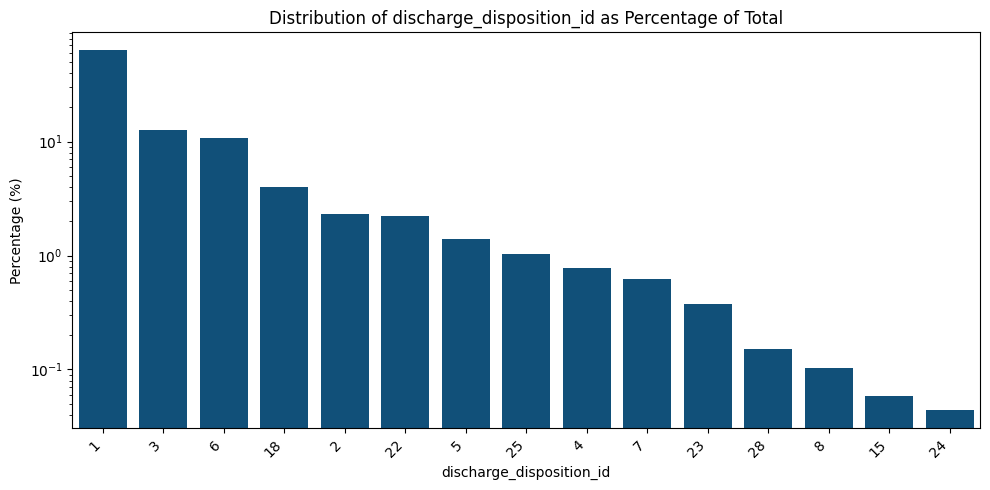

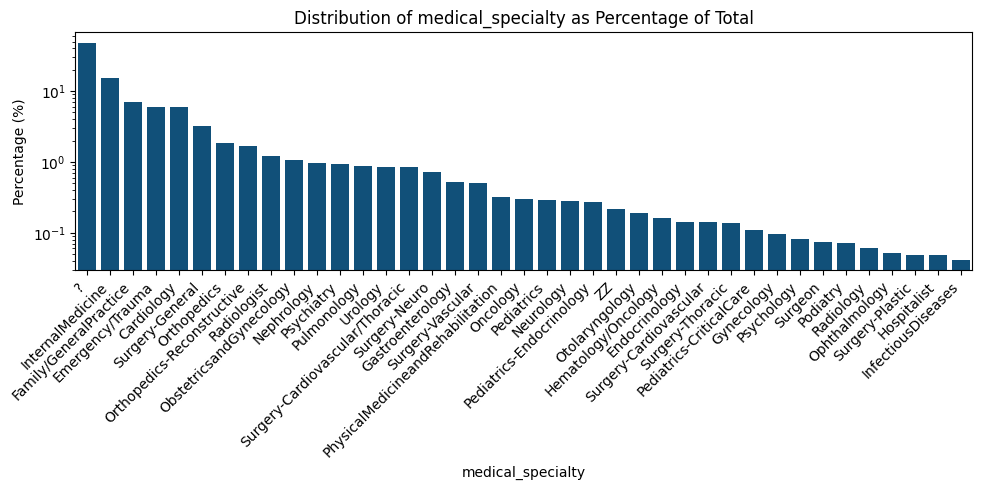

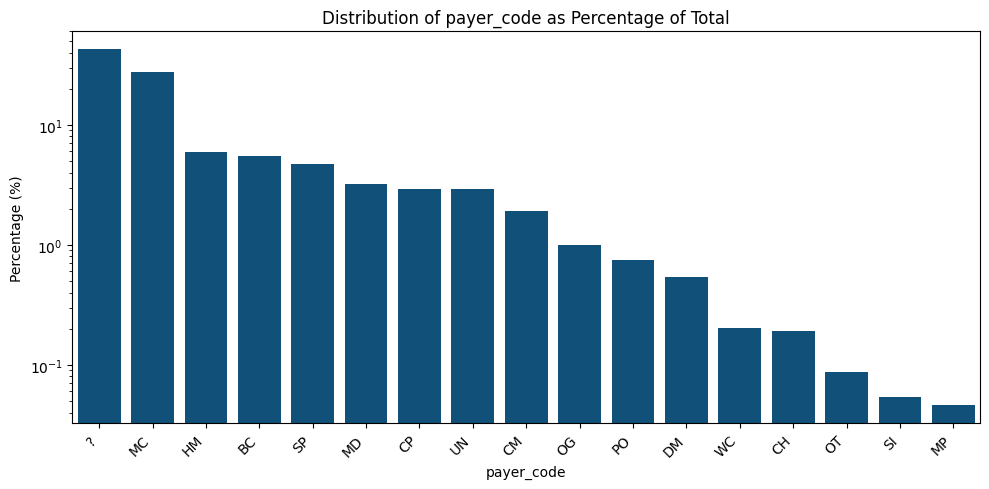

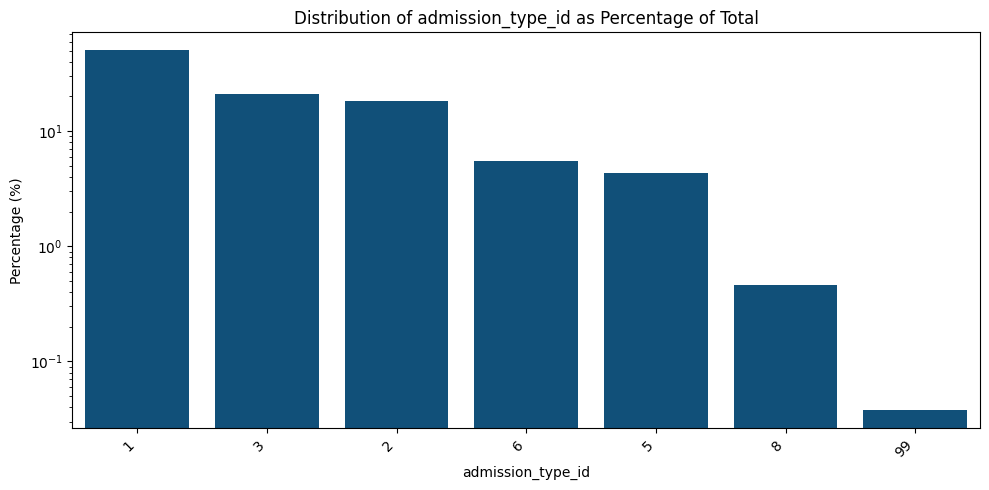

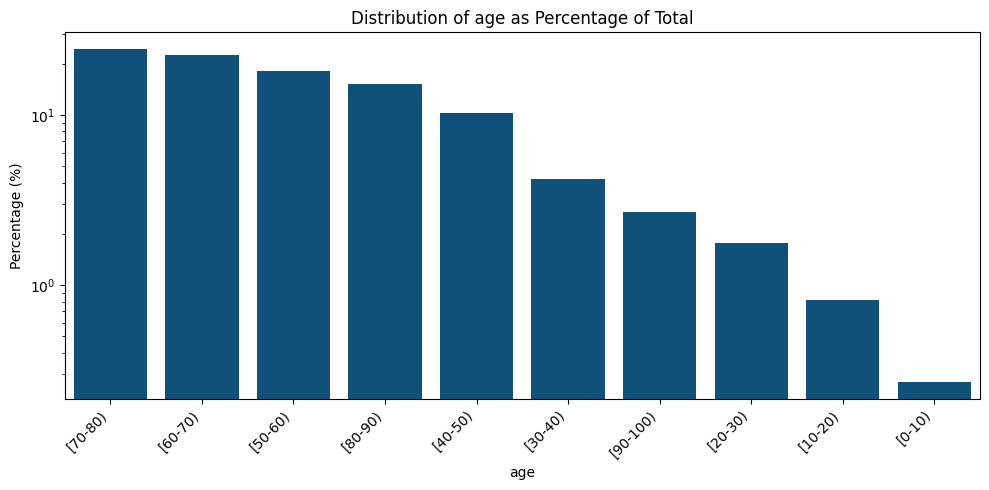

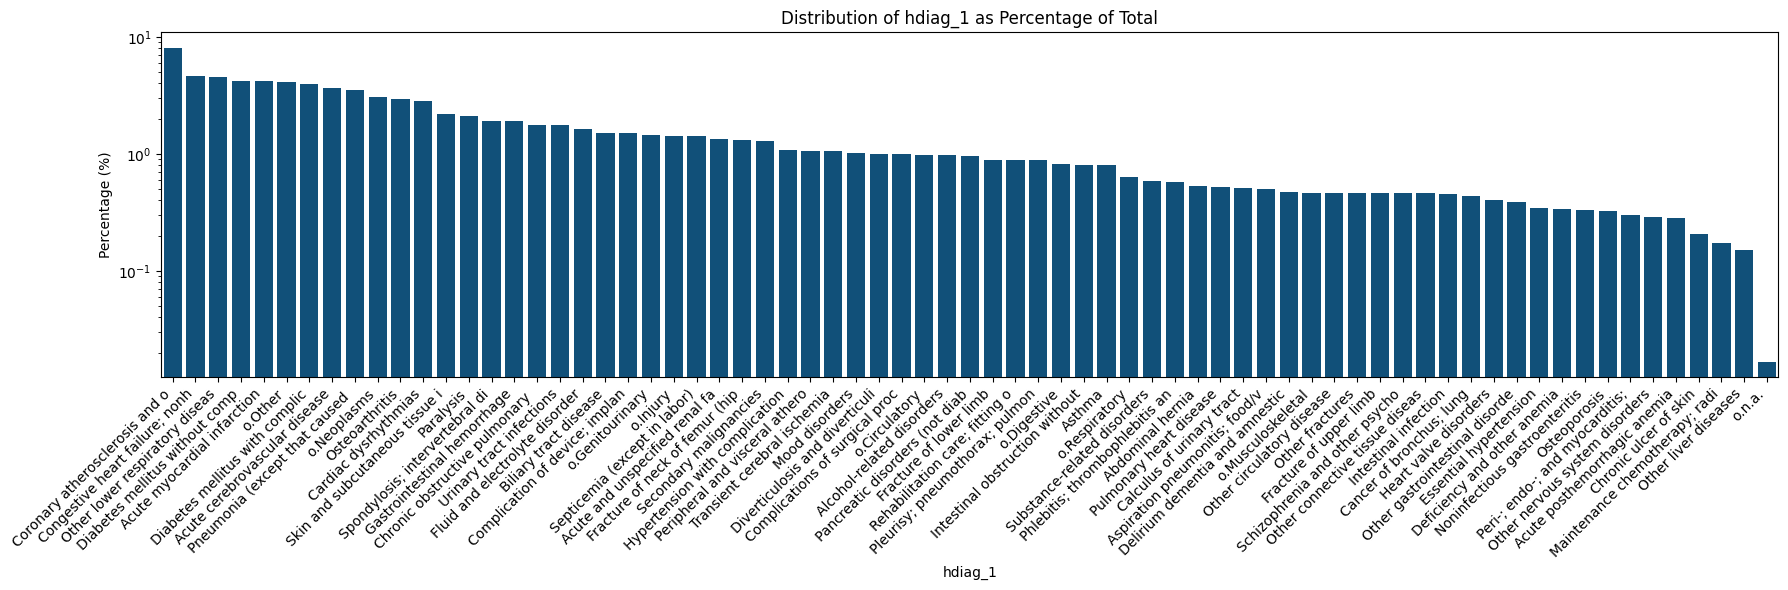

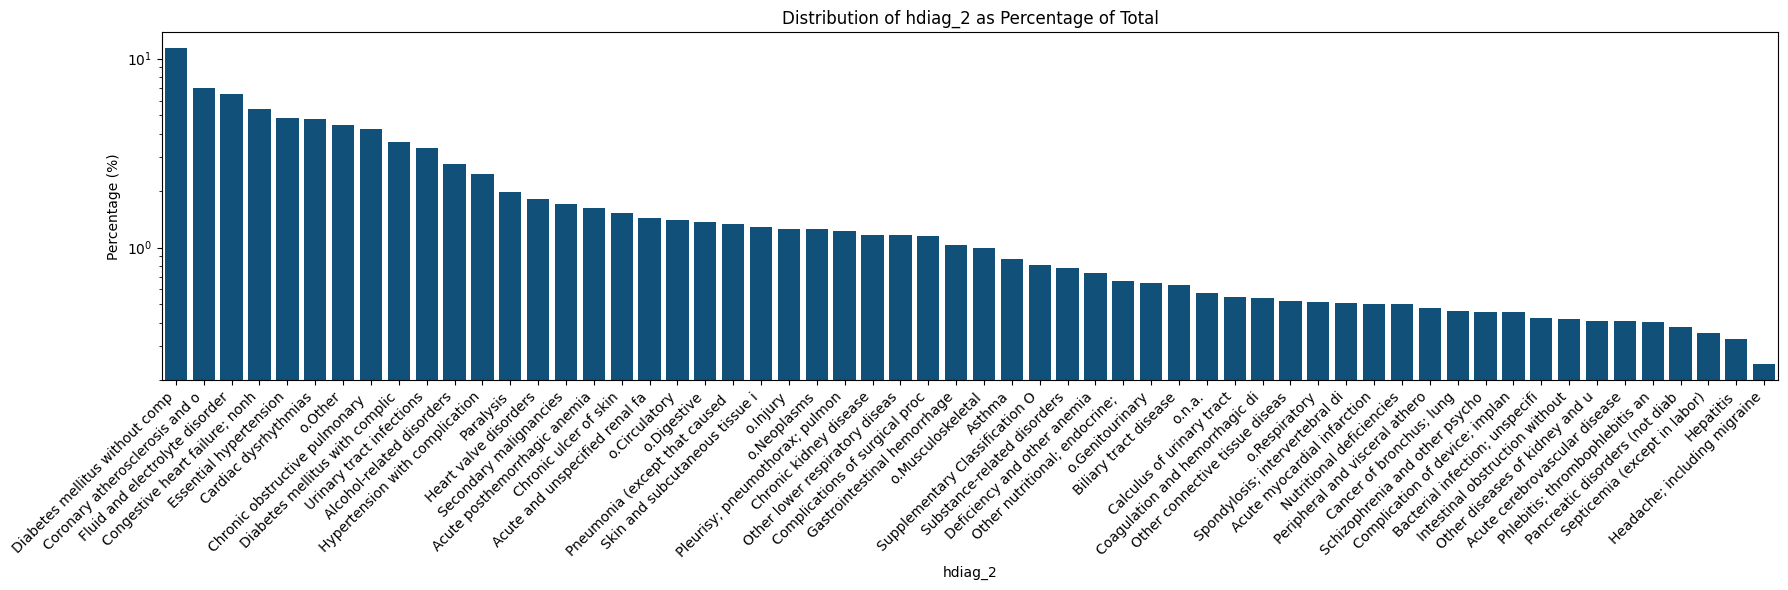

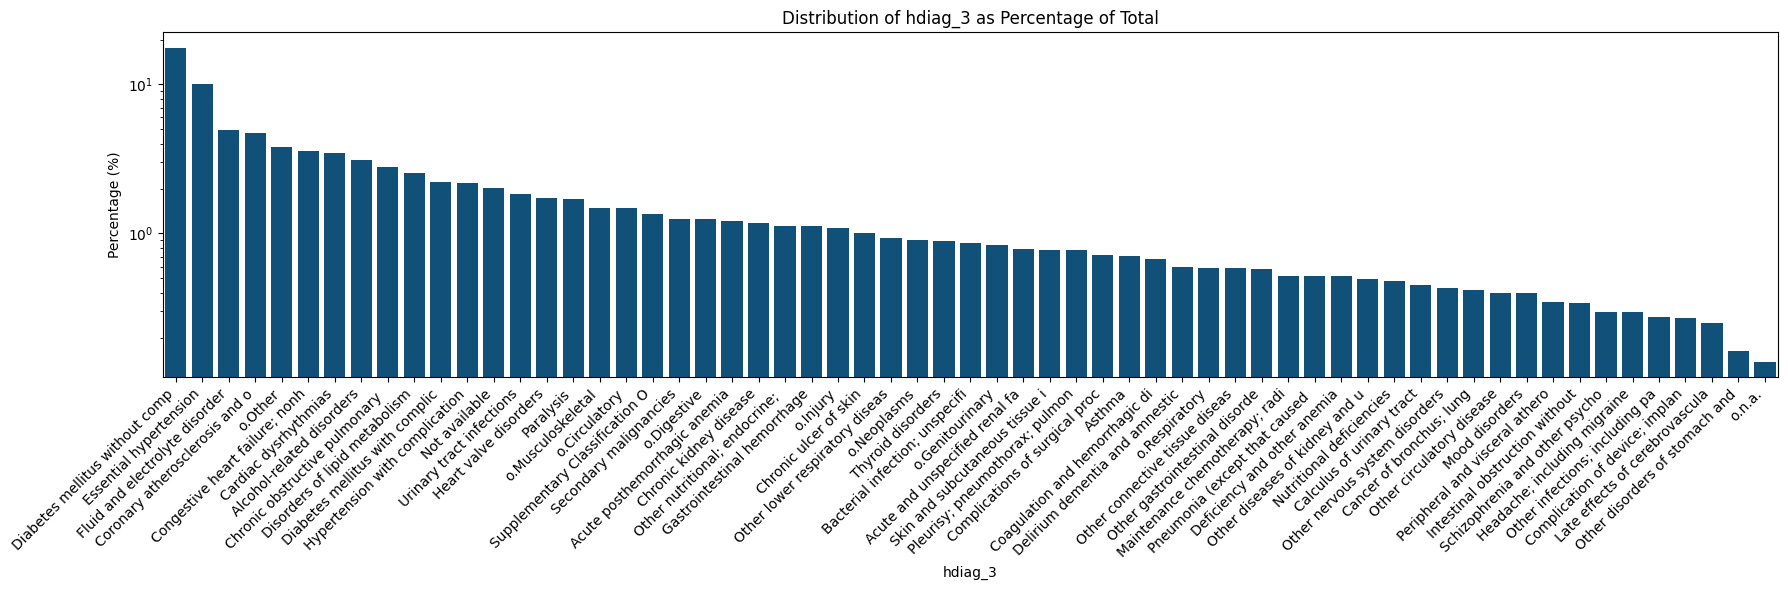

In [66]:
# Function to display relative frequencies for categorical features
def plot_relative_frequencies(features, fig_width, fig_height):
    for feature in features:
        plt.figure(figsize=(fig_width, fig_height))
        feature_counts = df_pre2[feature].value_counts(normalize=True) * 100
        
        sns.barplot(
            x=feature_counts.index.astype(str), y=feature_counts.values,
            color=COLOR_DARK
        )
        
        plt.title(f"Distribution of {feature} as Percentage of Total")
        plt.ylabel("Percentage (%)")
        plt.yscale('log') # Set y-axis to log base 10
        plt.xlabel(feature)
        plt.xticks(rotation=45, ha='right')
        
        plt.tight_layout()
        plt.show()

# Plot each categorical feature as a bar chart showing relative frequencies
plot_relative_frequencies(categorical_features_to_adjust.keys(), 10, 5)
plot_relative_frequencies([f'h{diag}' for diag in diag_cols], 18, 6)

After replacing rare values, we observe that features with only a few distinct categories and adequate frequencies, such as `discharge_disposition_id`, `payer_code`, `admission_type`, `age`, remain unchanged in their distribution. 

In contrast, features like `medical_specialty`, as well as `hdiag_1`, `hdiag_2`, `hdiag_3`, undergo significant transformation: the distributions become noticeably more uniform, as many low-frequency values are consolidated into broader grouped categories (e.g., `ZZ` or `o.{group}`). Some notable patterns are:
- **Dominance of consolidation labels**: In the `hdiag_*` features, for example, the artificially introduced label `o.Other` becomes one of the top categories. This suggests that a substantial portion of the data originally consisted of highly fragmented or rare specialties, making them unsuitable for robust statistical modeling without grouping.

- **Smoothing of category distribution**: The `hdiag_*` features, for example, show a flattening of the frequency curve after grouping infrequent diagnostic categories. In other words, a more balanced representation emerges. This helps reduce model bias toward overly common diagnosis categories while still preserving signal in more general diagnostic groups.

##  <font color='red'> Task PT5: Creating Stable Diagnosis Embeddings with a High-Performance Neural Network</font>

__Task PT5-1: [Learning objectives: 5.1 — Points: 6]__

a) Perform label encoding on the categorical variables generated in Task PT4-1 and Task PT4-2. Display three
random rows from the new dataset.

b) Scale the numerical features `number_inpatient`, `num_lab_procedures`, `number_diagnoses` and `num_medications`. Demonstrate the effect of the scaling.

c) To train a neural network, create a dataset consisting of the categorical features from PT4-2 a) and the
numerical features from part b) of this task. Split this dataset into 70% training data, 15% validation data,
and 15% test data.

__Solution:__

---
PT5-1 a)

We perform label encoding using basic Python by manually mapping each unique category to a corresponding integer. Alternatively, one can use `LabelEncoder` from `sklearn.preprocessing`.

In [67]:
# List of categorical columns to encode
categorical_features = list(categorical_features_to_adjust.keys()) + [f'h{diag}' for diag in diag_cols]

# Store the dataset before encoding as a backup
df_before_embeddings = df_pre2.copy()

# Perform label encoding manually (alternatively with LabelEncoder from sklearn)
for col in categorical_features:
    unique_vals = df_pre2[col].astype(str).unique()
    val_to_int = {val: idx for idx, val in enumerate(sorted(unique_vals))} # `sorted(unique_vals)` ensures consistent ordering.
    df_pre2[col] = df_pre2[col].astype(str).map(val_to_int)

# Display three random rows
df_pre2.sample(n=3, random_state=RANDOM_SEED)

,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,TARGET,group_diag_1,group_diag_2,group_diag_3,L2code_diag_1,L2code_diag_2,L2code_diag_3,category_diag_1,category_diag_2,category_diag_3,sum_target_cg_diag_1,sum_target_cg_diag_2,sum_target_cg_diag_3,hdiag_1,hdiag_2,hdiag_3
47523,Asian,Female,5,?,2,12,1,1,0,16,18,4,6,0,0,0,722,250,401,4,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0,Musculoskeletal,Diabetes,Circulatory,c13.3,c3.2,c7.1,Spondylosis; intervertebral disc disorders; ot...,Diabetes mellitus without complication,Essential hypertension,17,961,474,58,21,21
8582,Caucasian,Male,4,?,1,12,4,8,0,0,45,6,53,0,0,0,410,414,401,7,None,None,No,No,No,No,No,No,No,Up,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Ch,Yes,0,Circulatory,Circulatory,Circulatory,c7.2,c7.2,c7.1,Acute myocardial infarction,Coronary atherosclerosis and other heart disease,Essential hypertension,10,261,474,3,18,21
42024,Caucasian,Female,7,?,0,9,7,3,7,0,47,0,13,0,0,0,25012,427,276,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0,Diabetes,Circulatory,Other,c3.3,c7.2,c3.8,Diabetes mellitus with complications,Cardiac dysrhythmias,Fluid and electrolyte disorders,193,260,317,20,10,22


PT5-1 b)

To scale the numerical features and demonstrate the effect, we’ll use **standardization** (z-score normalization), which transforms each value to have:

- Mean = 0
- Standard deviation = 1

We'll then compare the **original vs. scaled distributions** numerically as well as visually.

In [68]:
# Numerical columns to scale
numerical_features = ['number_inpatient', 'num_lab_procedures', 'number_diagnoses', 'num_medications']

# Compute means and stds before scaling (for comparison)
before_scaling = df_pre2[numerical_features].describe()

# Manual standardization
for col in numerical_features:
    mean = df_pre2[col].mean()
    std = df_pre2[col].std()
    df_pre2[col] = (df_pre2[col] - mean) / std

# Compute means and stds after scaling
after_scaling = df_pre2[numerical_features].describe()

# Show comparison side-by-side
print("Before Scaling:\n", before_scaling)
print("\nAfter Scaling:\n", after_scaling)

Before Scaling:
        number_inpatient  num_lab_procedures  number_diagnoses  num_medications
count      47751.000000        47751.000000      47751.000000     47751.000000
mean           0.138259           42.356746          7.102092        15.559716
std            0.532646           19.809284          2.046605         8.516024
min            0.000000            1.000000          1.000000         1.000000
25%            0.000000           30.000000          5.000000        10.000000
50%            0.000000           44.000000          8.000000        14.000000
75%            0.000000           56.000000          9.000000        20.000000
max           12.000000          132.000000         16.000000        81.000000

After Scaling:
        number_inpatient  num_lab_procedures  number_diagnoses  num_medications
count      4.775100e+04        4.775100e+04      4.775100e+04     4.775100e+04
mean      -2.142744e-17        4.999735e-17     -1.761811e-16    -4.419409e-17
std        1.00000

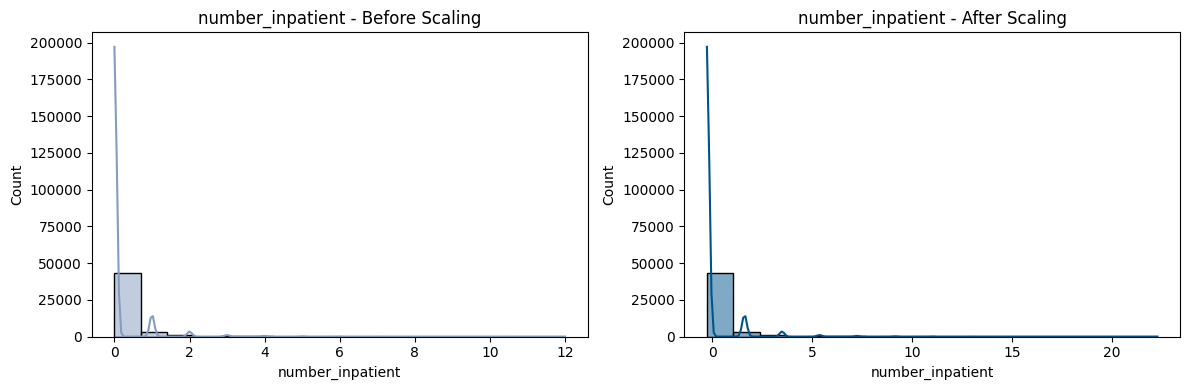

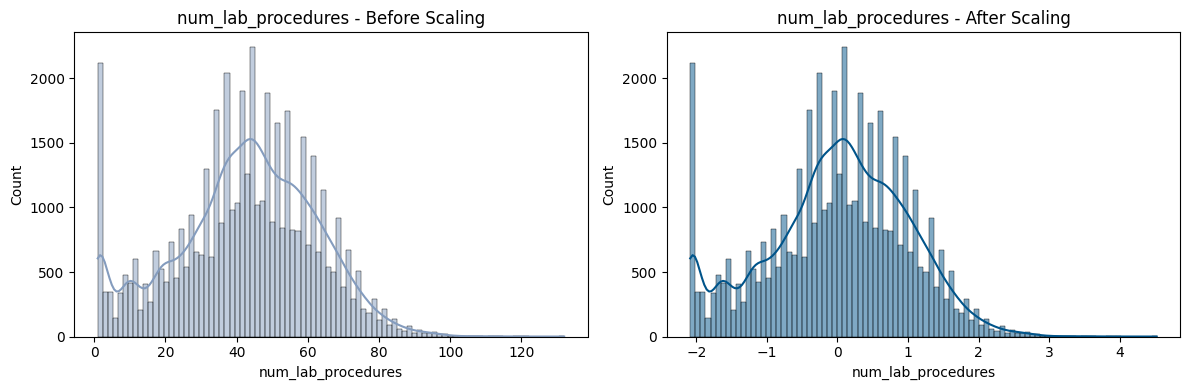

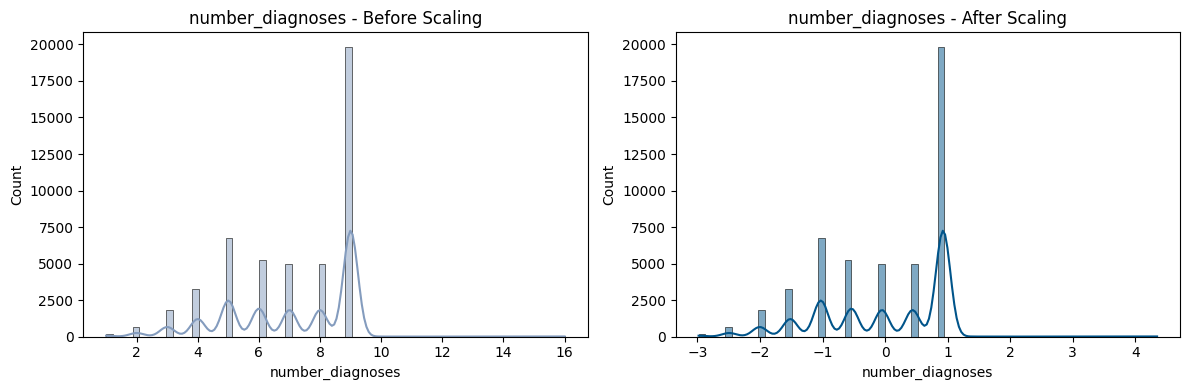

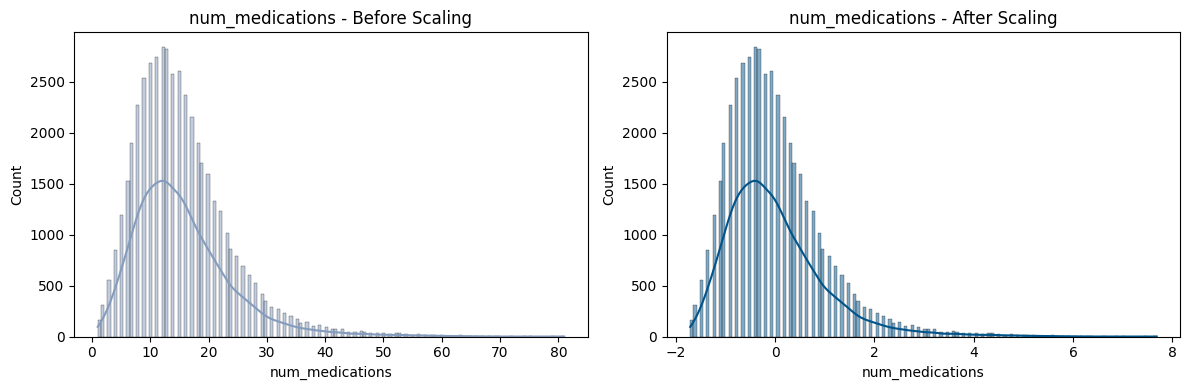

In [69]:
# Plot the distribution of numerical features before and after scaling
for col in numerical_features:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    sns.histplot(df_before_embeddings[col], ax=axes[0], kde=True, color=COLOR_LIGHT)
    axes[0].set_title(f"{col} - Before Scaling")
    
    sns.histplot(df_pre2[col], ax=axes[1], kde=True, color=COLOR_DARK)
    axes[1].set_title(f"{col} - After Scaling")
    
    plt.tight_layout()
    plt.show()

Note that the scaling doesn't change the structure of the distribution, but the range and magnitude of the feature values are transformed. Each numerical feature, namely `number_inpatient`, `num_lab_procedures`, `number_diagnoses`, and `num_medications`, is rescaled to have a mean of 0 and a standard deviation of 1. As mentioned in [Section 6.1](#a06), this transformation ensures that all features contribute equally to distance-based algorithms (like k-NN or SVM) and improves numerical stability in gradient-based models (e.g., logistic regression, neural networks).

Importantly, the relative spacing between values and the shape of the distribution (e.g., skewness, modality) are preserved. However, for instance in the plot of `number_inpatient`, outliers may now appear more extreme due to the scaling of standard deviations. 

Visual inspection before and after scaling confirms this shift in scale while maintaining overall distributional patterns.

PT5-1 c)

We now combine the processed categorical and numerical features into a new dataset, `df2`, which will be used to train a neural network with embeddings for the categorical features. The dataset is then split into 70% training, 15% validation, and 15% test data as desired.

In [70]:
# Create the dataset consisting of the features processed above together with the TARGET
df2 = df_pre2[categorical_features + numerical_features + ['TARGET']]

In [71]:
# Split the dataset into training, validation and test data
# Constants for data split ratios
TRAIN_RATIO = 0.7
VAL_TEST_RATIO = 0.5  # Splitting the remaining 30% equally into validation and test

# Separate the features (X) and the target (y)
X2 = df2.drop(columns=['TARGET'], axis=1)
y2 = df2['TARGET']

# Split the dataset into a training set and a combined validation and test set
X2_train, X2_val_test, y2_train, y2_val_test = train_test_split(X2, y2, train_size=TRAIN_RATIO, random_state=RANDOM_SEED)

# Further split the combined validation and test set into separate validation and test sets
X2_val, X2_test, y2_val, y2_test = train_test_split(X2_val_test, y2_val_test, test_size=VAL_TEST_RATIO, random_state=RANDOM_SEED)

# Verify the dimensions of the training, validation, and test sets by displaying (rows, columns)
print(f"Training set dimensions (rows, columns):   {X2_train.shape}")
print(f"Validation set dimensions (rows, columns):  {X2_val.shape}")
print(f"Test set dimensions (rows, columns):        {X2_test.shape}")

Training set dimensions (rows, columns):   (33425, 12)
Validation set dimensions (rows, columns):  (7163, 12)
Test set dimensions (rows, columns):        (7163, 12)


__Task PT5-2: [Learning objectives: 5.1 — Points: 20]__

a) Build a neural network to generate embeddings for the categorical features. The following should be considered:
- The input to the network is the dataset from PT5-1 c).
- An embedding with two dimensions should be generated for each categorical feature.
- The number of hidden layers can be chosen freely. The final choice must be justified.

b) Fit the network defined in part a). Plot the loss and validation loss over the training epochs. Comment on
the progression. Then, calculate the validation loss.

c) To assess the stability of the calculated embeddings in the next section, clone the network from a) and fit it again. Calculate and output the validation loss.

d) Extract the embeddings from both networks and plot them side by side in pairs. What anomalies or patterns
can be observed? What can be said about the stability of the embeddings?

__Solution:__


---
To accomplish this task, we use a complete pipeline built with TensorFlow/Keras, constructing a neural network that generates 2D embeddings for the categorical features and trains on our classification task of predicting readmission.

PT5-2 a)

To determine the optimal architecture for the hidden layers, we tune the artificial neural network by building several feed-forward models with one to three hidden layers, each containing between five and thirty neurons. Additionally, a dropout layer with varying dropout rates is applied after each dense layer to help reduce overfitting. These models are trained using different batch sizes and numbers of epochs, with the Adam optimizer facilitating the optimization process.

We first define a function that builds and compiles the neural network architecture based on hyperparameters:

In [72]:
def build_model(layers, dropout_rate, optimizer):
    
    # Define input layers and embedding layers
    inputs = {}
    embeddings = {}
    embedding_dim = 2  # 2D embeddings

    for col in categorical_features:
        # Number of unique feature values
        num_unique = df2[col].nunique()
        # Input layer
        inputs[col] = Input(shape=(1,), name=f"{col}_input", dtype='int64')
        
        # Embedding layer
        embeddings[col] = Embedding(input_dim=num_unique, output_dim=embedding_dim, name=f"{col}_embedding")(inputs[col])
        embeddings[col] = Flatten(name=f"{col}_flatten")(embeddings[col])

    # Add input for numerical features
    inputs['numerical'] = Input(shape=(len(numerical_features),), name="numerical_input")

    # Concatenate all features: categorical embeddings + numerical input
    all_features = list(embeddings.values()) + [inputs['numerical']]
    x = Concatenate(name="concat_layer")(all_features)
    
    if isinstance(layers, int): # 1 hidden layer
        x = Dense(layers, activation='relu', name=f'dense')(x)
        x = Dropout(dropout_rate, name=f'dropout')(x)
    else:
        for i, nodes in enumerate(layers):
            x = Dense(nodes, activation='relu', name=f'dense_{i+1}')(x)
            x = Dropout(dropout_rate, name=f'dropout_{i+1}')(x)

    # Output layer
    output = Dense(1, activation='sigmoid', name='output')(x)

    # Define and compile our neural network model
    ANN = Model(inputs=list(inputs.values()), outputs=output)
    ANN.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['auc'])

    return ANN

We prepare then the data for the model input:

In [73]:
# Categorical features
X2_train_cat = [X2_train[col].values for col in categorical_features]
X2_val_cat = [X2_val[col].values for col in categorical_features]
X2_test_cat = [X2_test[col].values for col in categorical_features]

# Numerical features (assumed already scaled)
X2_train_num = X2_train[numerical_features].values
X2_val_num = X2_val[numerical_features].values
X2_test_num = X2_test[numerical_features].values

# Combine and split
X2_train_ANN = X2_train_cat + [X2_train_num]
X2_val_ANN = X2_val_cat + [X2_val_num]
X2_test_ANN = X2_test_cat + [X2_test_num]

We then proceed in the typical scikit-learn style, performing hyperparameter optimization using randomized search and holdout validation. Note that the set of possible layer structures defined below is designed so that the initial layers capture complex feature interactions, while the subsequent layers, with fewer units, serve to compress the information and provide regularization.

In [74]:
# Hyperparameter search range 
param_grid = {
    'layers': [(10), (20), (30), (10, 5), (20, 5), (30, 5), (20, 10), (30, 10), (30,20,5), (30,20,10)],
    'dropout_rate': [0.1, 0.3, 0.5],
    'optimizer':  ['adam'], 
    'batch_size': [32, 64],
    'epochs': [10, 20]
}

# Define EarlyStopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_auc', # Watch validation auc
    patience=5, # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True # Restore model weights from the epoch with the best value of the monitored quantity
)

In [75]:
# Artificial neural network: Hyperparameter optimization with RandomizedSearchCV
tic = time.time()

results = []

# Ensure reproducibility
set_random_seed(RANDOM_SEED)

# Start the hyperparameter tuning
for i in range(20):  # Try 20 random configurations
    params = {
        k: random.choice(v)
        for k, v in param_grid.items()
    }

    # print(f"Trial {i+1}: {params}")
    ANN = build_model(params['layers'], params['dropout_rate'], params['optimizer'])
    
    # Fit the neural network defined in PT5-2 a)
    history = ANN.fit(
        X2_train_ANN, y2_train,
        validation_data=(X2_val_ANN, y2_val),
        epochs=params['epochs'],
        callbacks=[early_stopping],
        batch_size=params['batch_size'],
        verbose=0
    )

    val_loss = min(history.history["val_loss"])
    val_auc = max(history.history["val_auc"])

    results.append((params, val_loss, val_auc))

# Sort by best validation auc
results.sort(key=lambda x: x[2], reverse=True)

# Output the runtime and best parameters (as well as the runner-ups)
print("Elapsed time (sec):" + "%6.0f" % (time.time() - tic))
print("Best: %f using %s" % (results[0][2], results[0][0]))
result_df = pd.DataFrame(results, columns=['params', 'val_loss', 'val_auc'])
pd.concat([result_df['params'].apply(pd.Series), result_df[['val_loss', 'val_auc']]], axis=1).head(12)

Elapsed time (sec):   372
Best: 0.692090 using {'layers': (30, 10), 'dropout_rate': 0.3, 'optimizer': 'adam', 'batch_size': 32, 'epochs': 20}


,layers,dropout_rate,optimizer,batch_size,epochs,val_loss,val_auc
0,"(30, 10)",0.3,adam,32,20,0.359087,0.692090
1,"(30, 10)",0.1,adam,64,10,0.358597,0.689873
2,10,0.1,adam,32,10,0.358947,0.688083
3,"(20, 5)",0.3,adam,64,20,0.361231,0.687680
4,"(30, 20, 5)",0.1,adam,32,10,0.360035,0.685874
5,"(30, 20, 10)",0.3,adam,64,10,0.361238,0.685116
6,10,0.5,adam,64,10,0.361394,0.684720
7,10,0.1,adam,32,20,0.360505,0.684214
8,30,0.5,adam,64,20,0.360139,0.684154
9,10,0.5,adam,32,20,0.361033,0.684061


The best result was achieved with an architecture consisting of two hidden layers with 30 and 10 units, respectively, along with dropout layers using a dropout rate of 0.3. However, since the simplest architecture that achieved one of the best AUC scores consists of a single hidden layer with 10 units, we select it as the optimal trade-off between model complexity and training performance.

PT5-2 b)

We fit the network now with the best hyperparameters found in part a).

In [76]:
# Artificial neural network: Create a new model on all folds using the best parameters
start_time = time.time()

# Reset the seed after neural network tuning to ensure reproducibility
set_random_seed(RANDOM_SEED)

# Build the neural network model with the best hyperparameters
ANN = build_model((10), 0.1, 'adam')

# Fit the model
ANN_history = ANN.fit(
    X2_train_ANN, y2_train,
    validation_data=(X2_val_ANN, y_val),
    epochs=10,
    callbacks=[early_stopping],
    batch_size=32,
    verbose=1
)

# Calculate and print the running time in seconds
elapsed_time_ANN = time.time() - start_time
print(f"Elapsed time (sec): {elapsed_time_ANN:.2f}")

Epoch 1/10
1045/1045 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - auc: 0.5288 - loss: 0.5071 - val_auc: 0.6794 - val_loss: 0.3631
Epoch 2/10
1045/1045 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - auc: 0.6379 - loss: 0.3789 - val_auc: 0.6843 - val_loss: 0.3608
Epoch 3/10
1045/1045 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - auc: 0.6598 - loss: 0.3717 - val_auc: 0.6831 - val_loss: 0.3598
Epoch 4/10
1045/1045 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - auc: 0.6680 - loss: 0.3687 - val_auc: 0.6803 - val_loss: 0.3601
Epoch 5/10
1045/1045 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - auc: 0.6775 - loss: 0.3656 - val_auc: 0.6801 - val_loss: 0.3600
Epoch 6/10
1045/1045 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - auc: 0.6795 - loss: 0.3651 - val_auc: 0.6798 - val_loss: 0.3603
Epoch 7/10
1045/1045 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - auc: 0.6832 - loss: 0.3637 - val_auc: 0.6782 - val_loss: 0.3602
Elapsed time (sec): 20.94


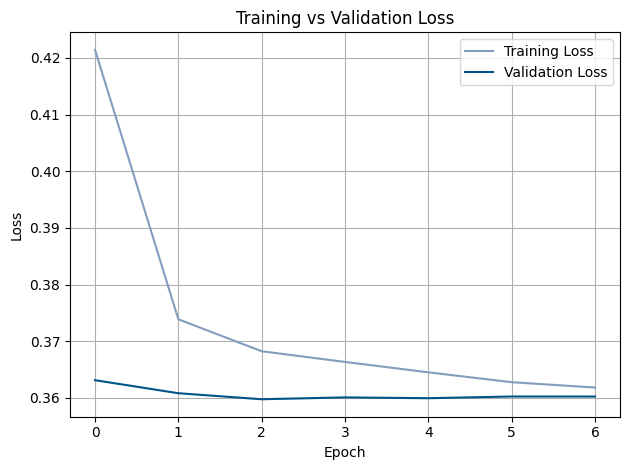

In [77]:
# Plot training and validation loss
plt.plot(ANN_history.history['loss'], label='Training Loss', color=COLOR_LIGHT)
plt.plot(ANN_history.history['val_loss'], label='Validation Loss', color=COLOR_DARK)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

From the progression plot, we observe the following:

The training loss drops rapidly during the early epochs (0–2), indicating that the model quickly learns patterns in the training data. It then continues to decline steadily, though at a slower rate. In contrast, the validation loss decreases only slightly at the beginning, remaining significantly lower than the training loss, but starts to increase steadily from around epoch 2 onward.

The widening gap between training and validation loss suggests that the model is beginning to overfit the training data. Since the validation loss stops improving after epochs 2–3, training was halted after five additional epochs to prevent further overfitting and to conserve computational resources.

We calculate and output now the validation loss as well as the validation auc.

In [78]:
# Calculate and display the model validation loss
val_loss = ANN.evaluate(X2_val_ANN, y2_val, verbose=0)[0]
print(f"Final Validation Loss: {val_loss:.4f}")

Final Validation Loss: 0.3608


In [79]:
# Calculate and display the model validation AUC 
auc_ANN = ANN.evaluate(X2_val_ANN, y2_val, verbose=0)[1]
print('The validation AUC of the neural network model with tuned hyperparameters is: {:.6f}'.format(auc_ANN))

The validation AUC of the neural network model with tuned hyperparameters is: 0.684344


PT5-2 c)

To assess the stability of the embeddings, we clone the same network architecture and compare the validation loss and learned embeddings from both runs.

In [80]:
# Clone the netork from PT5-2 a)
ANN_clone = tf.keras.models.clone_model(ANN)
ANN_clone.compile(optimizer='adam', loss='binary_crossentropy', metrics=['auc'])  # recompile

# Fit the network once more
ANN_history_clone = ANN_clone.fit(
    X2_train_ANN, y2_train,
    validation_data=(X2_val_ANN, y2_val),
    epochs=10,
    callbacks=[early_stopping],
    batch_size=32,
    verbose=1
)

# Calculate and output the validation loss
val_loss_clone = ANN.evaluate(X2_val_ANN, y2_val, verbose=0)[0]
print(f"Final Validation Loss: {val_loss_clone:.4f}")

Epoch 1/10
1045/1045 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - auc: 0.5361 - loss: 0.4957 - val_auc: 0.6773 - val_loss: 0.3632
Epoch 2/10
1045/1045 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - auc: 0.6450 - loss: 0.3755 - val_auc: 0.6817 - val_loss: 0.3614
Epoch 3/10
1045/1045 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - auc: 0.6644 - loss: 0.3700 - val_auc: 0.6817 - val_loss: 0.3605
Epoch 4/10
1045/1045 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - auc: 0.6747 - loss: 0.3667 - val_auc: 0.6797 - val_loss: 0.3602
Epoch 5/10
1045/1045 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - auc: 0.6821 - loss: 0.3644 - val_auc: 0.6785 - val_loss: 0.3604
Epoch 6/10
1045/1045 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - auc: 0.6868 - loss: 0.3628 - val_auc: 0.6771 - val_loss: 0.3608
Epoch 7/10
1045/1045 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - auc: 0.6847 - loss: 0.3630 - val_auc: 0.6759 - val_loss: 0.3611
Epoch 8/10
1045/1045 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - auc: 0.6896 - loss: 0.3616 - val_auc: 0.6754 - val_loss: 0.3609
Final Validation Loss: 0.3608


PT5-2 d)

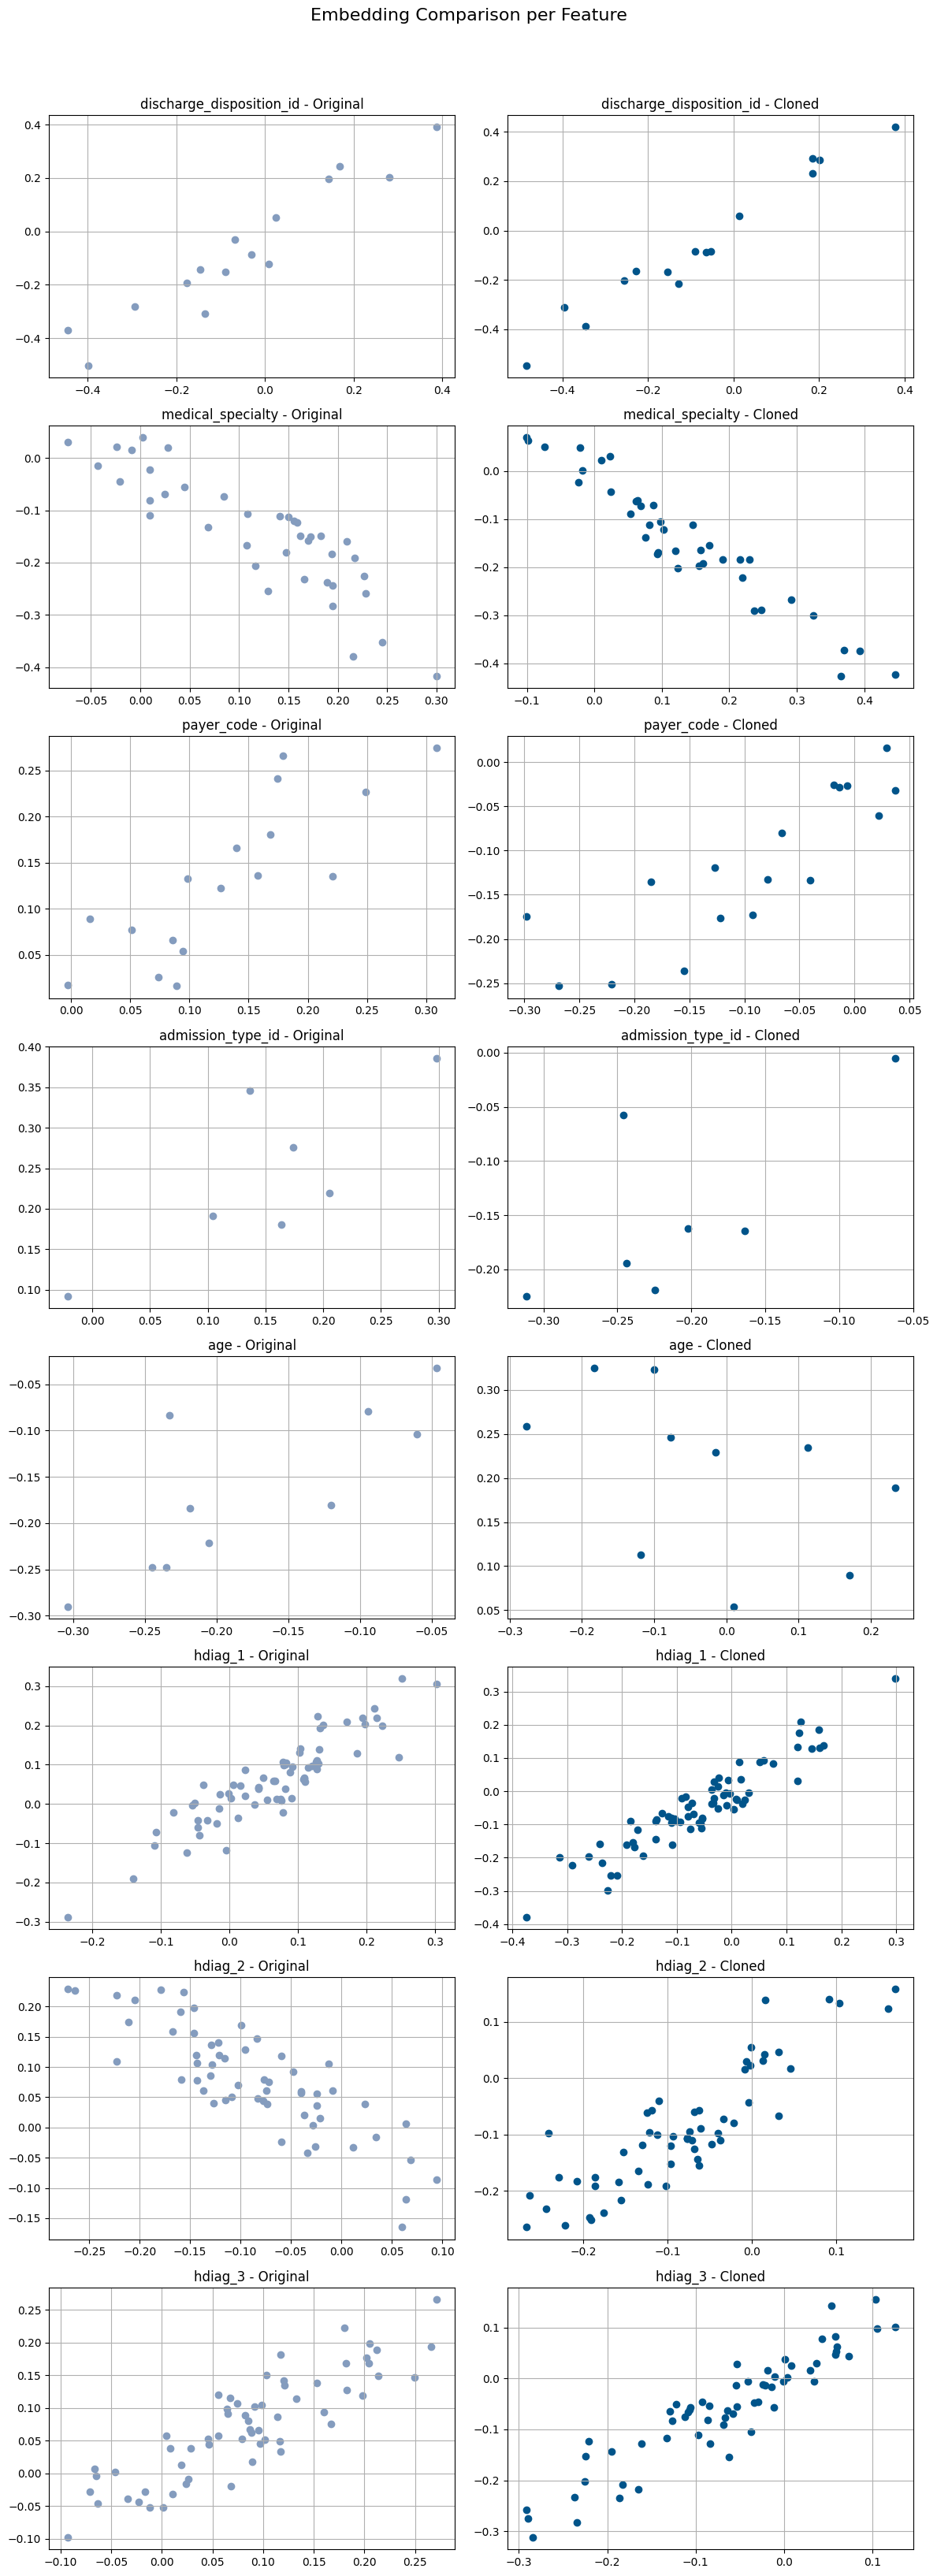

In [81]:
# Function to extract embedding weights
def get_embedding_weights(model, feature):
    layer = model.get_layer(f"{feature}_embedding")
    return layer.get_weights()[0]

# Prepare plot grid
n = len(categorical_features)
fig, axes = plt.subplots(n, 2, figsize=(12, n * 4))
fig.suptitle("Embedding Comparison per Feature", fontsize=16, y=1.02)

# Loop through features and plot
for i, feature in enumerate(categorical_features):
    emb1 = get_embedding_weights(ANN, feature)
    emb2 = get_embedding_weights(ANN_clone, feature)

    # Original model
    axes[i, 0].scatter(emb1[:, 0], emb1[:, 1], c=COLOR_LIGHT)
    axes[i, 0].set_title(f"{feature} - Original")
    axes[i, 0].grid(True)
    
    # Cloned model
    axes[i, 1].scatter(emb2[:, 0], emb2[:, 1], c=COLOR_DARK)
    axes[i, 1].set_title(f"{feature} - Cloned")
    axes[i, 1].grid(True)
    
plt.tight_layout()
plt.show()

**<u>Key observations and insights</u>**

1. **Preserved global structure**: Most features, such as `discharge_disposition_id` and `medical_specialty`, show similar spatial arrangements between the original and cloned models. This indicates strong **global consistency** in how categories with sufficient data support are embedded. The embedding learning process appears to **generalize well** and is **robust to moderate changes**.

2. **Shifted or rotated embeddings**: Embeddings like those for `hiag_2` and `age` appear **rotated or flipped** in the cloned model.  This is expected, as embeddings are inherently **invariant to affine transformations** such as rotation, reflection, or translation. What matters is the **relative positioning** of the categories, not their absolute coordinates.

3. **Differences in density and scale**: Features such as `hdiag_1` and `hdiag_3`) show noticeable variation in **spread and compactness** between the original and cloned versions. These **local differences** suggest sensitivity to model initialization and learning dynamics, possibly amplified by the high cardinality or complexity of the categories.

4. **Random dispersion in sparse categories**: For features with **low-frequency categories** (e.g., `payer_code` and `medical_specialty`), one of the embedding sets (typically the cloned version) exhibits more **random scatter**. This points to **instability in sparsely represented categories**, which may not be consistently learned across training runs.

**<u>Conclusions on embedding stability</u>**

- **Moderate stability**:  High-frequency categories exhibit **greater embedding stability**, with well-preserved relative structures.
- **Sensitivity to initialization**: Low-frequency or underrepresented categories are **more prone to variability** due to random weight initialization and limited training signals.
- **Interpretability caution**: Embedding coordinates should not be interpreted in isolation; their meaning lies in **relative distances and spatial relationships**.
---

##  <font color='red'> Task PT6: Joining Embeddings and Using Them in Modeling [Learning objectives: 5.1 — Points: 15]</font>

The goal is to investigate how using the embeddings generated in PT5 (instead of the original categorical
variables) impacts the modeling results (i.e., the AUC score).

a) Extend the dataset from Task PT5-1 a) by adding the corresponding embedding results. Remove any unne-
cessary features from the dataset. Then, split the dataset into training (70%), validation (15%), and test
(15%) sets.

b) Based on the dataset from a): Perform logistic regression considering the embedding features. Compare
the model in Section 2.2 for guidance. What can be concluded in comparison to it?

c) Similar to b): Apply CatBoost considering the embedding features. What can be concluded in comparison
to the result from Section 1.5 (baseline model)?

d) Finally, evaluate the impact of the embeddings in the models considered. Use a bar chart that displays
the previous models (i.e., especially the first calculated CatBoost model, logistic regression, as well as
models from one-hot encoding and subsampling) with the validation results. The evaluation should include
statements on the usefulness of embeddings and your personal recommendation.

__Solution:__

---
PT6 a)

In [82]:
# Loop through features and extend dataset with its embedding vectors
for i, feature in enumerate(categorical_features):
    # Get embedding weights and map each category to its embedding
    emb_weights = get_embedding_weights(ANN, feature)
    embeddings = {label: emb_weights[label] for label in range(emb_weights.shape[0])}

    # Replace the categorical column with its embedding columns
    embedding_df = df2[feature].map(embeddings)
    embedding_df = pd.DataFrame(embedding_df.tolist(),
                                index=df2.index,
                                columns=[f"{feature}_emb_{i}" for i in range(emb_weights.shape[1])])
    
    # Join embeddings to the original dataset
    df2 = pd.concat([df2, embedding_df], axis=1)
    
    # Drop the original categorical columns if now embedded
    df2.drop(columns=[feature], inplace=True)

In [83]:
# Split the dataset into training, validation and test data
# Constants for data split ratios
TRAIN_RATIO = 0.7
VAL_TEST_RATIO = 0.5  # Splitting the remaining 30% equally into validation and test

# Separate the features (X) and the target (y)
X2 = df2.drop(columns=['TARGET'], axis=1)
y2 = df2['TARGET']

# Split the dataset into a training set and a combined validation and test set
X2_train, X2_val_test, y2_train, y2_val_test = train_test_split(X2, y2, train_size=TRAIN_RATIO, random_state=RANDOM_SEED)

# Further split the combined validation and test set into separate validation and test sets
X2_val, X2_test, y2_val, y2_test = train_test_split(X2_val_test, y2_val_test, test_size=VAL_TEST_RATIO, random_state=RANDOM_SEED)

# Verify the dimensions of the training, validation, and test sets by displaying (rows, columns)
print(f"Training set dimensions (rows, columns):   {X2_train.shape}")
print(f"Validation set dimensions (rows, columns):  {X2_val.shape}")
print(f"Test set dimensions (rows, columns):        {X2_test.shape}")

Training set dimensions (rows, columns):   (33425, 20)
Validation set dimensions (rows, columns):  (7163, 20)
Test set dimensions (rows, columns):        (7163, 20)


PT6 b)

We perform now logistic regression considering the embedding features (without `hdiag_2` and `hdiag_3`) and compare it to the result with the original categorical features in Section 2.2.

In [84]:
# Combine features and target variable into a single dataframe for formula-based modeling
Xy2_train = X2_train.copy()
Xy2_val = X2_val.copy()

Xy2_train['TARGET'] = y2_train 
Xy2_val['TARGET'] = y2_val

# Start timer to calculate the running time of training the logistic regression model
start_time = time.time()

# Define the logistic regression model using statsmodels' formula API and fit it to the training data
predictors = "+".join([col for col in X2_train.columns if not re.search(r"hdiag_2|hdiag_3", col)])
LR2 = smf.logit(formula=f"TARGET ~ {predictors}", data=Xy2_train).fit()

# Calculate and print the running time in seconds
elapsed_time_LR2 = time.time() - start_time
print(f"Elapsed time (sec): {elapsed_time_LR2:.2f}")

# Display a summary of the logistic regression model results
print(LR2.summary())

Optimization terminated successfully.
         Current function value: 0.362905
         Iterations 7
Elapsed time (sec): 0.12
                           Logit Regression Results                           
Dep. Variable:                 TARGET   No. Observations:                33425
Model:                          Logit   Df Residuals:                    33408
Method:                           MLE   Df Model:                           16
Date:                Tue, 13 May 2025   Pseudo R-squ.:                 0.06717
Time:                        11:19:43   Log-Likelihood:                -12130.
converged:                       True   LL-Null:                       -13004.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                         -0.4283  

In [85]:
# Evaluate the performance of the logistic regression model on the validation data
# and calculate the Area Under the Curve (AUC) for the ROC
auc_LR2 = roc_auc_score(y2_val, LR2.predict(X2_val))

# Print the validation AUC
print(f'The validation AUC of the logistic regression model is: {auc_LR2:.6f}')

The validation AUC of the logistic regression model is: 0.677810


**Conclusion**: Compared with the baseline model from [Section 1.5](#a01), we observe that the embedding-based model offers several advantages:
 - A higher pseudo R² (0.06717 vs. 0.05995), indicating a better model fit;
 - A higher log-likelihood (−12,130 vs. −12,224), reflecting lower training loss;
 - A slightly lower validation AUC, which may indicate mild overfitting or random variation; and more importantly,
 - Faster runtime and fewer features, pointing to greater efficiency.

Additionally, when comparing shared numerical predictors, we note that while `num_medications` is not statistically significant at the 5% level in the baseline model, it is `num_lab_procedures` that lacks significance in the embedding-based model.

In summary, the embedding-based model outperforms the baseline in nearly every aspect. However, its primary drawback lies in interpretability; for example, we cannot directly determine which discharge disposition or age bracket is captured by `emb_0` or `emb_1`. Additionally, the stability of the learned embedding weights poses another concern. Addressing these issues would significantly enhance the model's practical applicability.

PT6 c)

We proceed by applying the CatBoost model to our prepared dataset with the embedding features, again utilizing the default settings for a straightforward evaluation without hyperparameter tuning.

In [86]:
# Start timer to calculate the running time of training the CatBoost model
start_time = time.time()

# Fit the CatBoostClassifier on the training data
CB7 = CatBoostClassifier(eval_metric='AUC', random_seed=RANDOM_SEED)
CB7.fit(X2_train, y2_train, logging_level='Silent')

# Calculate and print the running time in seconds
elapsed_time_CB7 = time.time() - start_time
print(f"Elapsed time (sec): {elapsed_time_CB7:.2f}")

Elapsed time (sec): 15.83


In [87]:
# Calculate the AUC score using the model's prediction probabilities for the positive class
auc_CB7 = roc_auc_score(y2_val, CB7.predict_proba(X2_val)[:, 1])

# Print the validation AUC
print(f'The validation AUC of the CatBoost model with standard hyperparameters is: {auc_CB7:.6f}')

The validation AUC of the CatBoost model with standard hyperparameters is: 0.673485


While the training time of the embedding-based CatBoost model is significantly shorter than that of both the baseline model from [Section 1.5](#a01) and the model using encoded categorical features from [Section 6.2](#a06), its predictive performance is noticeably lower. One possible explanation is the exclusion of certain features during the embedding creation process that were previously included. To ensure a fair comparison with the baseline model, we therefore include these omitted features as well.

In [88]:
# Loop through features and extend dataset with its embedding vectors
for i, feature in enumerate(categorical_features):
    # Get embedding weights and map each category to its embedding
    emb_weights = get_embedding_weights(ANN, feature)
    embeddings = {label: emb_weights[label] for label in range(emb_weights.shape[0])}

    # Replace the categorical column with its embedding columns
    embedding_df = df_pre2[feature].map(embeddings)
    embedding_df = pd.DataFrame(embedding_df.tolist(),
                                index=df_pre2.index,
                                columns=[f"{feature}_emb_{i}" for i in range(emb_weights.shape[1])])
    
    # Join embeddings to the original dataset
    df_pre2 = pd.concat([df_pre2, embedding_df], axis=1)
    
    # Drop the original categorical columns if now embedded
    df_pre2.drop(columns=[feature], inplace=True)

In [89]:
# Split the dataset into training, validation and test data
# Constants for data split ratios
TRAIN_RATIO = 0.7
VAL_TEST_RATIO = 0.5  # Splitting the remaining 30% equally into validation and test

# Separate the features (X) and the target (y)
X2_all = df_pre2.drop(columns=['TARGET'], axis=1)
y2 = df_pre2['TARGET']

# Split the dataset into a training set and a combined validation and test set
X2_all_train, X2_all_val_test, y2_train, y2_val_test = train_test_split(X2_all, y2, train_size=TRAIN_RATIO, random_state=RANDOM_SEED)

# Further split the combined validation and test set into separate validation and test sets
X2_all_val, X2_all_test, y2_val, y2_test = train_test_split(X2_all_val_test, y2_val_test, test_size=VAL_TEST_RATIO, random_state=RANDOM_SEED)

# Verify the dimensions of the training, validation, and test sets by displaying (rows, columns)
print(f"Training set dimensions (rows, columns):   {X2_all_train.shape}")
print(f"Validation set dimensions (rows, columns):  {X2_all_val.shape}")
print(f"Test set dimensions (rows, columns):        {X2_all_test.shape}")

Training set dimensions (rows, columns):   (33425, 70)
Validation set dimensions (rows, columns):  (7163, 70)
Test set dimensions (rows, columns):        (7163, 70)


In [90]:
# Start timer to calculate the running time of training the CatBoost model
start_time = time.time()

# Identify categorical features by data type 'object'
cat_features = list(df_pre2.select_dtypes(include=['object']).columns)

# Fit the CatBoostClassifier on the training data
CB8 = CatBoostClassifier(eval_metric='AUC', cat_features=cat_features, random_seed=RANDOM_SEED)
CB8.fit(X2_all_train, y2_train, logging_level='Silent')

# Calculate and print the running time in seconds
elapsed_time_CB8 = time.time() - start_time
print(f"Elapsed time (sec): {elapsed_time_CB8:.2f}")

Elapsed time (sec): 170.29


In [91]:
# Calculate the AUC score using the model's prediction probabilities for the positive class
auc_CB8 = roc_auc_score(y2_val, CB8.predict_proba(X2_all_val)[:, 1])

# Print the validation AUC
print(f'The validation AUC of the CatBoost model with standard hyperparameters is: {auc_CB8:.6f}')

The validation AUC of the CatBoost model with standard hyperparameters is: 0.701283


As verified above, however, the model based on the dataset that reintroduces the previously omitted features, namely those not considered in Tasks PT4 and PT5, still fails to deliver improved performance, despite requiring a longer training time. This reinforces the point that enhancing the interpretability and stability of embeddings remains crucial for improving the model’s practical utility.

PT6 d)

In [92]:
# Evaluate the impact of the embeddings in the models considered
# Store name and AUC of prevoisly fitted models 
mname.extend(["CB6_tuned", "LGB_tuned", "XGB_tuned", 
              "ANN_tuned", "LR2_with_embeddings", 
              "CB7_with_embeddings", "CB8_quick_with_embeddings"])
mauc.extend([auc_CB6, auc_LGB, auc_XGB, 
             auc_ANN, auc_LR2, auc_CB7, auc_CB8])
mtrainingtime.extend([elapsed_time_CB6, elapsed_time_LGB, elapsed_time_XGB, 
                      elapsed_time_ANN, elapsed_time_LR2, 
                      elapsed_time_CB7, elapsed_time_CB8])

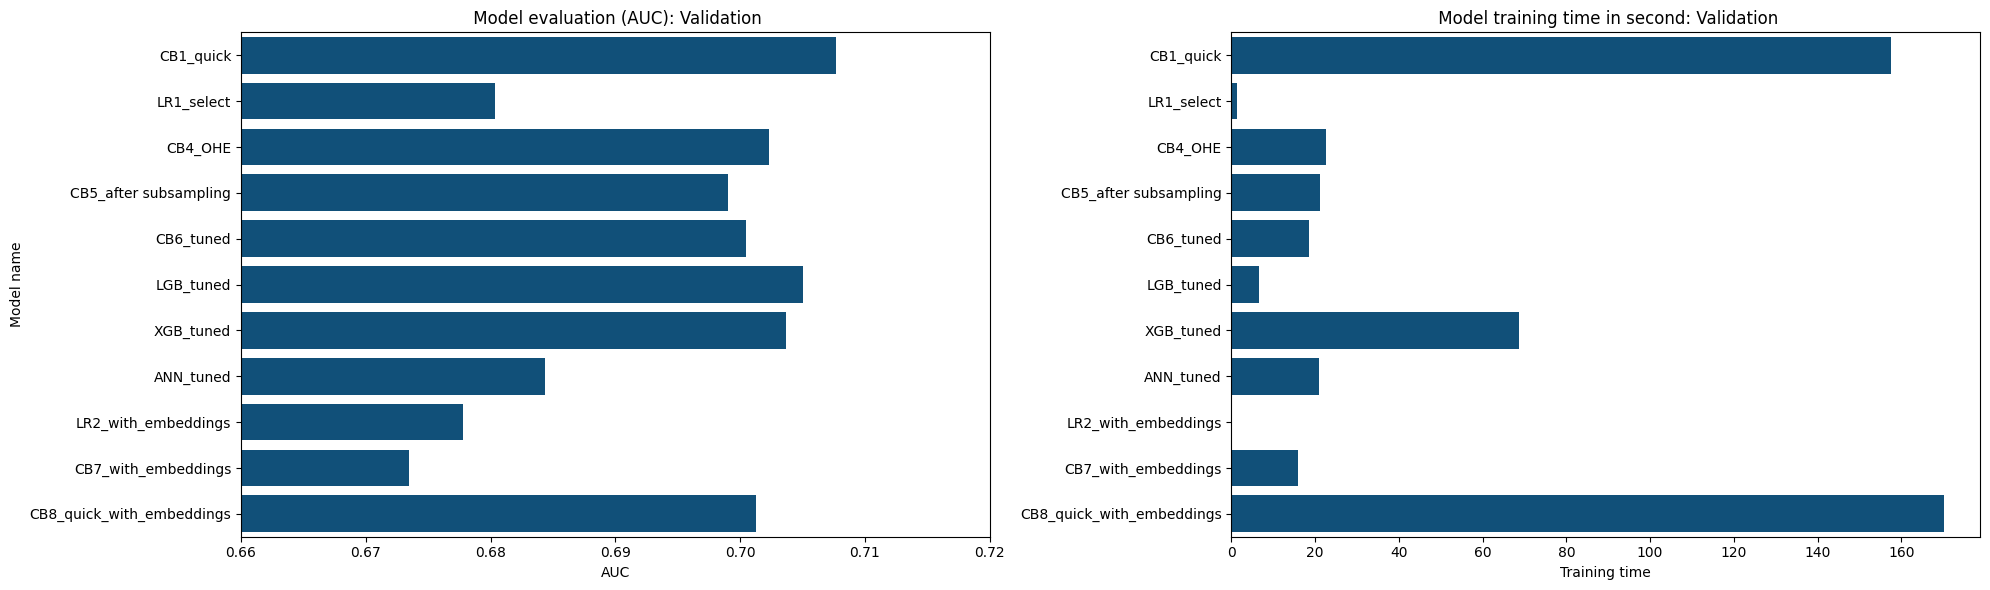

In [93]:
plot_model_performance(dict, 0.66, 0.72, "Validation")

**Evaluation of Embeddings in the Models**:

1. **Performance (AUC)**
    Embedding-based models (LR2_with_embeddings, CB8_quick_with_embeddings) exhibit slightly lower validation AUC scores compared to their non-embedding counterparts (LR1_select, CB1_quick, CB4_OHE, etc.). The best-performing model remains CB1_quick, the CatBoost variant with minimal feature preprocessing, although it also requires much longer training time.

2. **Training Time**
    Excluding CB8_quick_with_embeddings,  where a notable portion of runtime is spent on categorical feature encoding, embedding-based models demonstrate faster training times. Both CB7_with_embeddings and LR2_with_embeddings are among the quickest to train. In contrast, CB1_quick and XGB_tuned demand substantially longer runtimes, a critical consideration for large-scale or time-sensitive applications.

**Usefulness of Embeddings**:

- **Pros**: 
  * Enable better scalability for high-cardinality categorical features compared to one-hot encoding.
  * Significantly reduce training time, which is beneficial for rapid prototyping or resource-constrained environments.

- **Cons**: 
  * Slightly reduced predictive performance (lower AUC), potentially due to reduced granularity or challenges in training optimal embeddings;
  * Lack of interpretability: Embeddings are difficult to interpret, posing challenges in regulated or high-stakes domains (e.g. healthcare in our case).

**Recommendation**:

If minimizing training time or improving scalability is the primary objective, embedding-based models offer a compelling solution with only marginal performance trade-offs. However, when predictive accuracy and interpretability are paramount, models using one-hot encoding, augmented with thoughtful feature engineering and tuning, remain the preferred choice.

In summary, embeddings provide valuable benefits in terms of efficiency but should be applied judiciously, particularly when performance or interpretability is a critical concern.

##  <font color='red'> Task PT7: AutoML, Model Evaluation, and Application [Learning objectives: 5.1 — Points: 16]</font>

* a)  Using AutoML or any other model or model ensemble not used so far (e.g., Stacking, Blending), try to improve the AUC score. An example of AutoML is AutoGluon, see https://auto.gluon.ai/stable/index.html. As before, work with training, validation, and test sets, and evaluate the model performance.

* b) At the end of the notebook, Section 11 should be fully adjusted, and everything following it (Section 12,
Appendix) should be deleted. In 11.1, evaluate all models created or optimized in the previous sections
(excluding individual Search-CV models).
In 11.2, at least six models should be selected for the Lift Chart, and an appropriate model should be
chosen for the subsequent probability and percentile analyses.

__Solution:__


---
To improve the AUC score using an approach not previously explored, we employ AutoGluon, a powerful AutoML library, to train and optimize models, potentially leveraging ensemble techniques such as stacking. As input, we use the already encoded, scaled, and subsampled dataset, **excluding embeddings** for reasons outlined in the previous task.

In [87]:
# Install AutoGluon and import required module
!pip install autogluon
from autogluon.tabular import TabularPredictor

  Using cached autogluon-1.3.0-py3-none-any.whl.metadata (11 kB)
  Using cached autogluon.core-1.3.0-py3-none-any.whl.metadata (12 kB)
  Using cached autogluon.features-1.3.0-py3-none-any.whl.metadata (11 kB)
  Using cached autogluon.tabular-1.3.0-py3-none-any.whl.metadata (14 kB)
  Using cached autogluon.multimodal-1.3.0-py3-none-any.whl.metadata (13 kB)
  Using cached autogluon.timeseries-1.3.0-py3-none-any.whl.metadata (12 kB)
  Using cached networkx-3.4.2-py3-none-any.whl.metadata (6.3 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached boto3-1.38.13-py3-none-any.whl.metadata (6.6 kB)
  Using cached autogluon.common-1.3.0-py3-none-any.whl.metadata (11 kB)
  Using cached hyperopt-0.2.7-py2.py3-none-any.whl.metadata (1.7 kB)
  Using cached ray-2.44.1-cp310-cp310-win_amd64.whl.metadata (20 kB)
  Using cached pyarrow-20.0.0-cp310-cp310-win_amd64.whl.metadata (3.4 kB)
  Using cached torch-2.6.0-cp310-cp310-win_amd64.whl.metadata (28 kB)
  Using cached lightni


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip
c:\Users\chunn\anaconda3\envs\ads3\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [94]:
# Combine features and target variable into a single dataframe as reuqired by AutoGluon
Xy_train = X_train.copy()
Xy_val = X_val.copy()

Xy_train['TARGET'] = y_train 
Xy_val['TARGET'] = y_val.reset_index(drop=True) # Since StandardScaler above has reset the index

In [97]:
# Start timer to calculate the running time of training the CatBoost model
start_time = time.time()

# Ensure reproducibility
set_random_seed(RANDOM_SEED)

# Initialize and fit the AutoGluon predictor
AG = TabularPredictor(label='TARGET', eval_metric='roc_auc', path='autogluon_diabetes_auc').fit(
    train_data=Xy_train,
    time_limit=3600,         # One hour to search for the best model
    presets='best_quality',  # Enables stacking, bagging, hyperparameter tuning for best possible performance
    auto_stack=True,         # Explicit stacking (included in 'best_quality')
    num_stack_levels=2       # Number of meta-model layers
)

elapsed_time_AG = time.time() - start_time
print(f"Elapsed time (sec): {elapsed_time_AG:.2f}")

Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.3.0
Python Version:     3.10.16
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.26100
CPU Count:          12
Memory Avail:       2.35 GB / 15.73 GB (14.9%)
Disk Space Avail:   512.29 GB / 936.72 GB (54.7%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=2, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be fit on subsets of the data. Then holdout validation data is used to detect stacked overfitting.
	Running DyStack for up

Elapsed time (sec): 3615.57


In [98]:
# View leaderboard
leaderboard = AG.leaderboard(Xy_val, silent=True)
leaderboard.head(15)

,model,score_test,score_val,eval_metric,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,LightGBM_BAG_L2,0.706243,0.698350,roc_auc,36.435412,50.441354,1027.245120,1.341141,0.623350,8.168139,2,True,24
1,LightGBM_r96_BAG_L2,0.705856,0.701887,roc_auc,37.057245,50.668730,1025.605496,1.962975,0.850726,6.528515,2,True,39
2,CatBoost_BAG_L2,0.705774,0.703741,roc_auc,36.082140,51.708746,1072.608280,0.987869,1.890742,53.531299,2,True,27
3,CatBoost_r177_BAG_L2,0.705515,0.703445,roc_auc,36.313934,51.491967,1073.612370,1.219664,1.673963,54.535389,2,True,34
4,RandomForestEntr_BAG_L1,0.705087,0.684488,roc_auc,0.566349,8.355005,12.145532,0.566349,8.355005,12.145532,1,True,6
5,LightGBM_r131_BAG_L2,0.704889,0.697478,roc_auc,36.857112,50.634384,1030.057138,1.762841,0.816380,10.980157,2,True,36
6,WeightedEnsemble_L2,0.704813,0.705625,roc_auc,13.358419,25.202521,601.281765,0.042000,0.000000,1.471262,2,True,22
7,LightGBMXT_BAG_L2,0.704788,0.700562,roc_auc,36.396357,50.646163,1026.403245,1.302086,0.828159,7.326264,2,True,23
8,CatBoost_r9_BAG_L2,0.704519,0.700336,roc_auc,36.573185,51.716511,1174.326463,1.478915,1.898508,155.249482,2,True,38
9,XGBoost_BAG_L2,0.704185,0.695643,roc_auc,37.234827,50.486380,1053.603121,2.140556,0.668376,34.526139,2,True,31


In [99]:
# Evaluate on validation data
performance = AG.evaluate(Xy_val)

# Extract and print the validation AUC score
auc_AG = performance['roc_auc']
print(f'The validation AUC of the best model from AutoGluon is: {auc_AG:.6f}')

The validation AUC of the best model from AutoGluon is: 0.700962


Unfortunately, the validation AUC score does not show improvement compared to the AUC of our initial baseline model. Nevertheless, we proceed with the best model ensemble selected by AutoGluon, which, in this case, corresponds to the seventh model on the leaderboard, namely the WeightedEnsemble_L2.

In [120]:
# Choose the best ensemble model (here the random forest)
WE = leaderboard.iloc[6]['model']

performance = AG.evaluate(Xy_val, model=WE)

# Extract and print the validation AUC score
auc_WE = performance['roc_auc']
print(f'The validation AUC of the best model from AutoGluon is: {auc_WE:.6f}')

The validation AUC of the best model from AutoGluon is: 0.704813


<h1 id="a11"
    style="font-size:18px; font-weight:bold;">
    11. Model Evaluation and Application
    <a class="anchor-link"
       href="#a11"
       target="_self"
       rel=" noreferrer nofollow">
    </a>
    <hr style="border: none; border-top: 3px solid black; margin-top: 10px;">
</h1>

<h2 style="font-size:16px; font-weight:bold;">11.1 Model evaluation: Validation and test set</h2>

Now that the modeling is complete, it is time to evaluate our models on test data and compare the results with the validation data and between the different models of interest. We consider all models created or optimized in the previous sections.

In [100]:
# Feature scaling using StandardScaler based on training data distributions (6.1)
X_test = pd.DataFrame(scaler.transform(X_test), columns = feature_names)

In [122]:
# Make preditions for test data
y_test_CB1 = CB1.predict_proba(X_raw_test)
y_test_LR1 = LR1.predict(X_pre_test)

y_test_CB4 = CB4.predict_proba(X_test)
y_test_CB5 = CB5.predict_proba(X_test)
y_test_CB6 = CB6.predict_proba(X_test)
y_test_LGB = LGB.predict_proba(X_test)
y_test_XGB = XGB.predict_proba(X_test)

y_test_ANN = ANN.predict(X2_test_ANN)
y_test_LR2 = LR2.predict(X2_test)
y_test_CB7 = CB7.predict_proba(X2_test)
y_test_CB8 = CB8.predict_proba(X2_all_test)

y_test_WE = AG.predict_proba(X_test, model=WE)

224/224 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [124]:
# Calulate model AUC based on test data 

auc_CB1_test = roc_auc_score(y_test, y_test_CB1[:, 1])
auc_LR1_test = roc_auc_score(y_test, y_test_LR1)

# Calculate the further model test AUC
auc_CB4_test = roc_auc_score(y_test, y_test_CB4[:, 1])
auc_CB5_test = roc_auc_score(y_test, y_test_CB5[:, 1])
auc_CB6_test = roc_auc_score(y_test, y_test_CB6[:, 1])
auc_LGB_test = roc_auc_score(y_test, y_test_LGB[:, 1])
auc_XGB_test = roc_auc_score(y_test, y_test_XGB[:, 1])

auc_ANN_test = roc_auc_score(y2_test, y_test_ANN[:, 0])
auc_LR2_test = roc_auc_score(y2_test, y_test_LR2)
auc_CB7_test = roc_auc_score(y2_test, y_test_CB7[:, 1])
auc_CB8_test = roc_auc_score(y2_test, y_test_CB8[:, 1])

auc_WE_test = roc_auc_score(y_test, y_test_WE[1])

In [126]:
# Data structures for model names, val/test-sample and AUC
mdict = {'Model name': [], 'Set': [], 'AUC': []}

# List of models and their AUC scores on validation and test sets
models_auc = [
    ("CB1_quick",           auc_CB1, auc_CB1_test),
    ("LR1_select",          auc_LR1, auc_LR1_test),
    ("CB4_OHE",             auc_CB4, auc_CB4_test),
    ("CB5_subsample",       auc_CB5, auc_CB5_test),
    ("CB6_tuned",           auc_CB6, auc_CB6_test),
    ("LGB_tuned",           auc_LGB, auc_LGB_test),
    ("XGB_tuned",           auc_XGB, auc_XGB_test),
    ("ANN_tuned",           auc_ANN, auc_ANN_test),
    ("LR2_with_embeddings", auc_LR2, auc_LR2_test),
    ("CB7_with_embeddings", auc_CB7, auc_CB7_test),
    ("CB8_quick_with_embeddings", auc_CB8, auc_CB8_test),
    ("WeightedEnsemble",    auc_WE, auc_WE_test),
]

# Populate the dictionary by looping over the models and their AUC scores
for model_name, auc_val, auc_test in models_auc:
    mdict['Model name'].extend([model_name] * 2)  # Model name twice for Val. and Test
    mdict['Set'].extend(["Val.", "Test"])
    mdict['AUC'].extend([auc_val, auc_test])

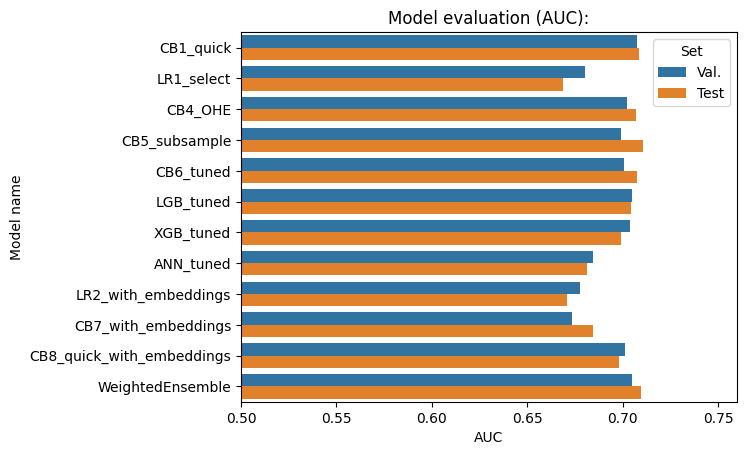

In [127]:
df_eval = pd.DataFrame(mdict)
plt.title("Model evaluation (AUC):")
sns.barplot(data=df_eval, x="AUC", y="Model name",hue="Set")
plt.xlim(0.50, 0.76)
plt.show()

We observe that CB1_quick, CB5_subsample, and WeightedEnsemble achieve the highest AUC scores on the test set, all slightly exceeding 0.70. Notably, models incorporating embeddings (such as CB8_quick_with_embeddings, LR2_with_embeddings) generally match or outperform their counterparts without embeddings in terms of test AUC. The logistic regression variants (LR1_select and LR2_with_embeddings) deliver consistent but relatively modest performance, with test AUC scores in the range of 0.66 to 0.68.

Interestingly, WeightedEnsemble achieves not only the highest test AUC but also maintains comparable validation performance, indicating good generalization. In contrast, some models (e.g., LR1_select) show a larger gap between validation and test performance, suggesting limited generalizability.

In conclusion, boosted tree models, even with minimal preprocessing, deliver the strongest results overall. Only some models exhibit a slight decline in AUC from validation to test set, which is typical and expected. However, the strong and consistent performance of WeightedEnsemble across both sets suggests that its automated ensembling and tuning mechanisms are highly effective in this context.

<h2 style="font-size:16px; font-weight:bold;">11.2 High risk prediction</h2>

In Subsection 11.1, we considered a model with the highest area under the Receiver Operating Characteristic Curve (AUC) to be the best based on all readmissions from low to high risk. Since the high-risk area usually receives the most attention for economic reasons, the performance of the models in this area is more decisive for the application. The lift chart is suitable for this evaluation. A cumulative lift chart shows the improvement that a model offers compared to a random estimate and measures the change in the form of a lift scores.

In [128]:
# Core of scikit-plot function cumulative_gain_curve (necessary, since scypi release 1.12.0 broke compatibility with scikit-plot version 0.3.7.
# Source: https://github.com/reiinakano/scikit-plot/blob/26007fbf9f05e915bd0f6acb86850b01b00944cf/scikitplot/helpers.py
def cumulative_gain_curve1(y_true, y_score):
    """This binary classification function generates the points necessary to plot the Cumulative Gain"""
    y_true, y_score = np.asarray(y_true), np.asarray(y_score)
    # make y_true a boolean vector
    y_true = (y_true == 1)
    sorted_indices = np.argsort(y_score)[::-1]
    y_true = y_true[sorted_indices]
    gains = np.cumsum(y_true)
    percentages = np.arange(start=1, stop=len(y_true) + 1)
    gains = gains / float(np.sum(y_true))
    percentages = percentages / float(len(y_true))
    gains = np.insert(gains, 0, [0])
    percentages = np.insert(percentages, 0, [0])
    return percentages, gains

# Calculate cumulative gains for lift chart 
def calculate_gains_and_percentages(model_predictions, y_true):
    """Calculate gains and percentages for a given model's predictions."""
    percentages, gains = cumulative_gain_curve1(y_true, model_predictions)
    gains_adjusted = gains[1:] / percentages[1:]  # Adjust gains starting from the second element
    return percentages[1:], gains_adjusted


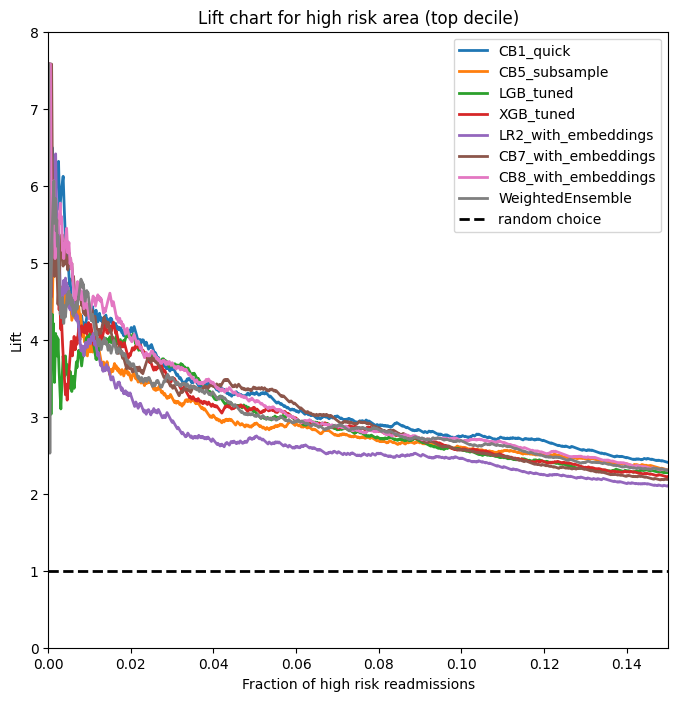

In [129]:
# Select models and prepare true and predicted values
y_true = np.array(np.ravel(y_test))
model_predictions = {
    'CB1_quick': np.array(y_test_CB1[:, 1]),
    'CB5_subsample': np.array(y_test_CB5[:, 1]),
    'LGB_tuned': np.array(y_test_LGB[:, 1]),
    'XGB_tuned': np.array(y_test_XGB[:, 1]),
    'LR2_with_embeddings': np.array(y_test_LR2),
    'CB7_with_embeddings': np.array(y_test_CB7[:, 1]),
    'CB8_with_embeddings': np.array(y_test_CB8[:, 1]),
    'WeightedEnsemble': np.array(y_test_WE[1]),
}

# Initialize lift chart
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_title("Lift chart for high risk area (top decile)")
ax.set_xlabel('Fraction of high risk readmissions')
ax.set_ylabel('Lift')
plt.xlim(0, 0.15)
plt.ylim(0, 8.0)

# Calculate and plot lift score for each model
for label, predictions in model_predictions.items():
    percentages, gains_adjusted = calculate_gains_and_percentages(predictions, y_true)
    ax.plot(percentages, gains_adjusted, lw=2, label=label)

# Plot random choice baseline
ax.plot([0, 1], [1, 1], 'k--', lw=2, label='random choice')
ax.legend(loc='upper right')
plt.show()

The cumulative lift chart illustrates the factor (lift score) by which the model enhances the "hit rate". For instance, targeting the top 10% of cases with the highest predicted probability of readmission, where the lift score is around 3, could capture 30% of all actual readmissions.

In our case, two standout models emerge in the top decile: the initial "quick & easy" baseline model and the CatBoost model with embeddings. However, the baseline model consistently performs better across most of the high-risk region. Thus, we can take this baseline model for defining the top risk segment. In the following analysis, we focus on the top decile and generate a list of the highest-risk readmission cases. Since we have the true outcomes in our test set, we compare these against the predicted probabilities.

In [130]:
# Merge predicted an true values into a DataFrame
df = pd.DataFrame({
    'PredProbability': y_test_CB1[:,1],
    'TrueValue': y_test
})

# Sort by Probability in descending order
df_sorted = df.sort_values(by='PredProbability', ascending=False)
df_sorted.head()

,PredProbability,TrueValue
34138,0.888056,1
33582,0.885106,1
45194,0.857854,1
33042,0.853814,1
32855,0.846220,0


In [131]:
# Creating a 'Percentile' column based on quantile-based discretization into 100 bins
df_sorted['Percentile'] = pd.qcut(df_sorted['PredProbability'], 100, labels=range(1, 101))

# Calculate means of predicted and true values for the top 10 percentiles
percentile_means = df_sorted.groupby('Percentile', observed=True).mean().tail(10)

# Printing the results for the top 10 percentiles
print(percentile_means[::-1])  # This reverses the order to start with the highest probabilities

            PredProbability  TrueValue
Percentile                            
100                0.632874   0.569444
99                 0.466461   0.527778
98                 0.405462   0.338028
97                 0.368264   0.361111
96                 0.339783   0.375000
95                 0.314150   0.253521
94                 0.290905   0.347222
93                 0.271439   0.267606
92                 0.256960   0.305556
91                 0.245194   0.277778


Although the predicted probabilities may deviate a little too much in most percentiles, the percentile ranking itself is highly effective. This ranking can be reliably used to guide decision-making, particularly when considering the varying and often substantial costs associated with inpatient care for individuals with diabetes mellitus.